In [1]:
import numpy as np
import pandas as pd
import math
#import pylab
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

%matplotlib inline
from sklearn import linear_model, datasets
from sklearn.impute import SimpleImputer
from matplotlib.colors import LinearSegmentedColormap
import gzip
#from Bio import SeqIO
import statsmodels.api as sm
import statsmodels.stats.api as sms

import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
from my_functions import *
import random
from sklearn.utils import resample
from sklearn.metrics import r2_score
from decimal import Decimal

matplotlib.rcParams['text.usetex'] = False
#matplotlib.rcParams['mathtext.fontset'] = 'cm'
#matplotlib.rcParams['font.family'] = 'cm'
#matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

# Load disomes Relative growth datasets
preprocessed in notebook 'RG_barplots_dataset_preparation'

In [2]:
# Everything normalized to euploid wt
#RG_WT = pd.read_csv('result_datasets/230601_RG_WT_4repeats_per_disomes.csv', index_col=1)
#RG_ssd1 = pd.read_csv('result_datasets/230601_RG_ssd1_4repeats_per_disomes.csv', index_col=1)

# IMPORTANT
# aneuploid WT normalized to euploid WT, aneupploid ssd1 normalized to euploid ssd1
RG_WT = pd.read_csv('result_datasets/230601_RGWT_disWT_4repeats_per_disomes.csv')
RG_ssd1 = pd.read_csv('result_datasets/230601_RGssd1_disssd1_4repeats_per_disomes.csv')

test_WT = pd.read_csv('result_datasets/220919_double_disomes_WT_3repeats.csv', index_col=1)
test_ssd1 = pd.read_csv('result_datasets/220919_double_disomes_ssd1_3repeats.csv', index_col=1)

In [3]:
RG_ssd1 = RG_ssd1[RG_ssd1['Chromosome'] != 16]

In [4]:
eup = {'Chromosome':['Eupl.', 'Eupl.'], 
        'MEAN RG':[100, 100], 
        'Genotype':['WT', 'ssd1']} 
  
eup = pd.DataFrame(eup) 

In [5]:
eup

,Chromosome,MEAN RG,Genotype
0,Eupl.,100,WT
1,Eupl.,100,ssd1


In [6]:
tmp = RG_WT[['Chromosome','MEAN RG']]
tmp['Genotype'] = 'WT'
tmp_s = RG_ssd1[['Chromosome', 'MEAN RG']]
tmp_s['Genotype'] = 'ssd1'

C:\Users\user\AppData\Local\Temp\ipykernel_19328\3875014520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Genotype'] = 'WT'
C:\Users\user\AppData\Local\Temp\ipykernel_19328\3875014520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_s['Genotype'] = 'ssd1'


In [7]:
tmp.loc[len(tmp.index)] = [6, 0, 'WT'] 
tmp.loc[len(tmp.index)] = [6, 0, 'ssd1'] 

C:\Users\user\AppData\Local\Temp\ipykernel_19328\3026383463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[len(tmp.index)] = [6, 0, 'WT']
C:\Users\user\AppData\Local\Temp\ipykernel_19328\3026383463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[len(tmp.index)] = [6, 0, 'ssd1']


In [8]:
tmp = tmp.sort_values('Chromosome')

In [9]:
tmp = pd.concat([eup, tmp, tmp_s], axis=0)

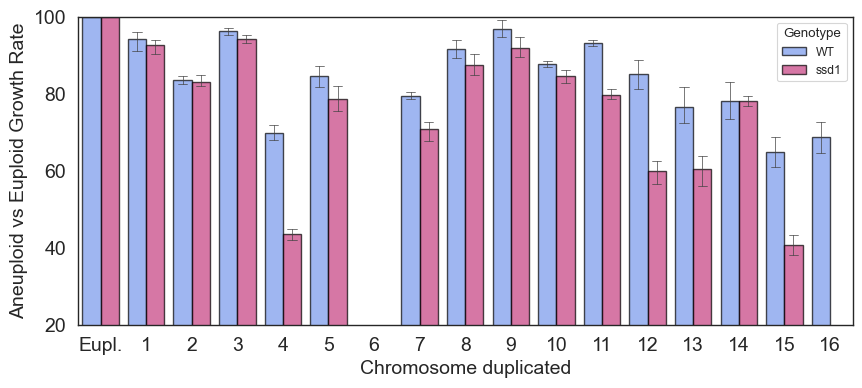

In [10]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1)

fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(x = 'Chromosome',
            y = 'MEAN RG',
            hue = 'Genotype',
            data = tmp, palette = ['#648FFF', '#DC267F'], alpha=0.7, linewidth=1, edgecolor='black', capsize=0.2, errwidth=0.5, width =0.8)

ax.set_xlabel('Chromosome duplicated', fontsize=14)
ax.set_ylabel('Aneuploid vs Euploid Growth Rate', fontsize=14)
ax.set_ylim([20, 100])
ax.set_axisbelow(True)
#ax.set_title('Disomies fitness cost', fontsize = 15)
ax.tick_params(axis='both', labelsize=14)
#ax.grid(axis='y')
plt.savefig('plots/RG_barplot_RG_to_WT_or_ssd1del.svg')
plt.show()

# Show the plot
plt.show()

In [11]:
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)>

# Load MoBy and YPS1009 gene annotation

In [162]:
# load a list of yps1009 annotated genes 
genes_yps = pd.read_csv('datasets/yps1009_genes_final.txt', index_col=0, sep='\t')
genes = genes_yps[genes_yps['orf_classification'] != 'Dubious']
# Load the normalized moby data file from Auguste
moby = pd.read_csv('datasets/EUwt.txt', sep="\t", index_col=0)
genes = genes.join(moby)

In [163]:
genes.isna().sum()

gene                   584
Chromosome               0
orf_classification       2
logFC                 1359
logCPM                1359
F                     1359
PValue                1359
FDR                   1359
dtype: int64

In [173]:
g = []
for m in moby.index:
    if '_' not in m:
        g.append(m)

In [175]:
# empty vector plus 4462 genes
len(g)

4463

In [18]:
mobyC = moby.join(genes[['Chromosome']]).dropna()

In [185]:
mobyC

,logFC,logCPM,F,PValue,FDR,Label,Chromosome
YAL001C,-3.092912,7.964166,78.955749,8.703864e-08,0.000002,Toxic,1.0
YAL002W,-1.894880,6.101773,11.329194,3.681350e-03,0.009340,Toxic,1.0
YAL003W,0.529155,8.314423,9.833551,6.040325e-03,0.014224,Beneficial,1.0
YAL005C,-1.705288,7.310590,32.280732,2.734392e-05,0.000171,Toxic,1.0
YAL007C,-0.253810,6.884367,0.940534,3.457778e-01,0.429537,Neutral,1.0
...,...,...,...,...,...,...,...
YPR190C,-3.163302,5.509484,39.955970,7.777800e-06,0.000063,Toxic,16.0
YPR191W,0.189222,7.653669,1.485296,2.396399e-01,0.316397,Neutral,16.0
YPR196W,0.895352,6.981489,31.784768,2.986224e-05,0.000183,Beneficial,16.0
YPR199C,-2.815942,4.921814,34.940506,1.730845e-05,0.000117,Toxic,16.0


meta NOT subset; don't know how to subset; dropped


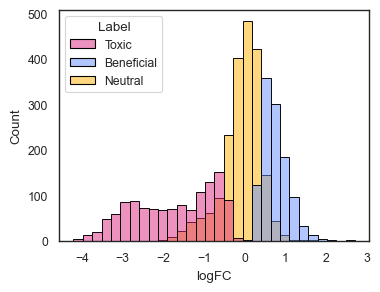

In [183]:
# setting the dimensions of the plot
Label = []
for index, row in mobyC.iterrows():
    if row['logFC'] < 0 and row['FDR'] < 0.05:
        Label.append('Toxic')
    elif row['logFC'] > 0 and row['FDR'] < 0.05:
        Label.append('Beneficial')   
    else:
        Label.append('Neutral')
mobyC['Label'] = Label

fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(data=mobyC, x="logFC", hue='Label', bins=30, palette=["#DC267F", "#648FFF",  "#FFB000"], edgecolor = 'black')
fig.savefig('plots/moby_histogram_benef_toxic.pdf', bbox_inches='tight')

meta NOT subset; don't know how to subset; dropped


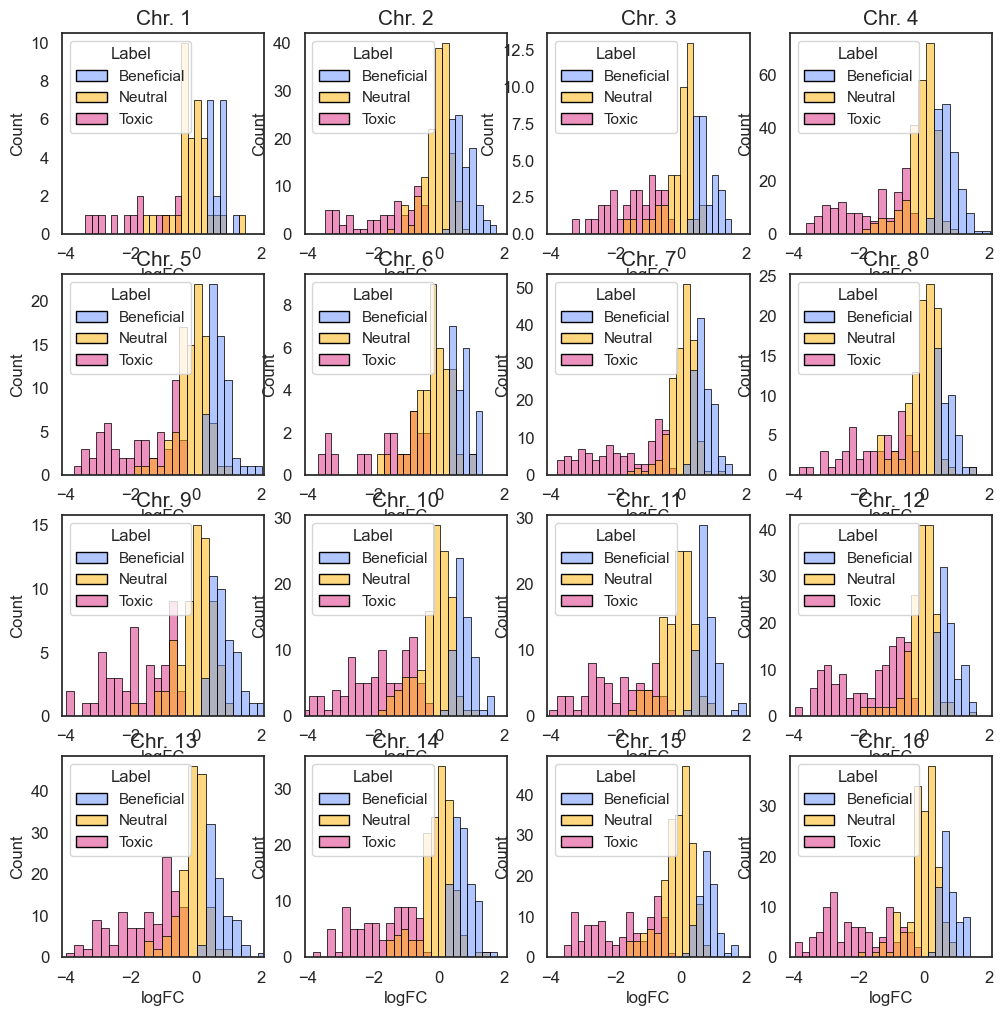

In [19]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.set_style("white")
columns = 4
rows = 4
count = 1
fig, ax = plt.subplots(rows, columns)
for x in range(rows):
    if count <= 16:
        for y in range(columns):
            if count <=16:
                sns.histplot(data=mobyC[mobyC.Chromosome == count].sort_values('Label'), x="logFC", ax=ax[x, y], hue='Label', bins=25, palette=[ "#648FFF", "#FFB000", "#DC267F"], edgecolor='black')
                ax[x, y].set_title('Chr. ' + str(count), fontsize=15)
                ax[x, y].tick_params(labelsize=12)
                #ax[x,y].set_ylim(0, 75)
                ax[x,y].set_xlim(-4.1, 2.1)
                count += 1

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for a in ax.flat:
#    a.label_outer()

fig.savefig('plots/gene_fitness_hist_by_chr_v2.pdf', bbox_inches='tight')

In [181]:
sign = mobyC[mobyC.FDR < 0.05]
neg = sign[sign.logFC < 0]
pos = sign[sign.logFC > 0]
print('toxic genes: ', neg.shape[0])
print('beneficial genes: ', pos.shape[0])

toxic genes:  1229
beneficial genes:  1115


In [184]:
sign = moby[moby.FDR < 0.05]
neg = sign[sign.logFC < 0]
pos = sign[sign.logFC > 0]
print('toxic genes: ', neg.shape[0])
print('beneficial genes: ', pos.shape[0])

toxic genes:  1301
beneficial genes:  1162


In [182]:
print('toxic genes %: ', neg.shape[0]/mobyC.shape[0]*100)
print('beneficial genes %: ', pos.shape[0]/mobyC.shape[0]*100)

toxic genes %:  28.130006866559853
beneficial genes %:  25.520714122224764


In [22]:
def Fitlin_mean2(RG1, RG2, cx, cy, ax_l, filenamesvg=None, labels=True,  alpha=1):
    X1 = list(RG1[cx])
    y1 = list(RG1[cy])
    
    X2 = list(RG2[cx])
    y2 = list(RG2[cy])
    
    colors = ['#648FFF', '#DC267F']
        
    f, ax = plt.subplots()
    ax.set(xlim=(min((X1+X2))-15, max((X1+X2))+15), ylim=(min((y1+y2))-10, max((y1+y2))+10))
    sns.regplot(x=cx, y=cy, data=RG1, label=RG1.index, truncate=False, scatter=False,
                color=colors[0])
    sns.regplot(x=cx, y=cy, data=RG2, label=RG2.index, truncate=False, scatter=False,
                color=colors[1])
    
    mean1 = RG1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=mean1, ax=ax, s=60, alpha=alpha, color=colors[0], legend=False)
    
    mean2 = RG2.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=mean2, ax=ax, s=60, alpha=alpha, color=colors[1], legend=False)
    
    y_m1 = list(mean1[cy])
    x_m1 = list(mean1[cx])
    n1 = list(mean1['Chromosome'])
    
    y_m2 = list(mean2[cy])
    x_m2 = list(mean2[cx])
    n2 = list(mean2['Chromosome'])
    
    if labels:
        for i in range(len(n1)):
            ax.text(x_m1[i] + 10, y_m1[i] + 1, n1[i], horizontalalignment='center', color=colors[0], weight='light', fontsize= 12)
        for i in range(len(n2)):
            ax.text(x_m2[i] + 10, y_m2[i] + 1, n2[i], horizontalalignment='center', color=colors[1], weight='light', fontsize= 12)
    
               
    X1 = sm.add_constant(X1)
    results1 = sm.OLS(y1, X1).fit()
    
    X2 = sm.add_constant(X2)
    results2 = sm.OLS(y2, X2).fit()

    patch1 = mpatches.Patch(color=colors[0], label= r'$WT - adj. R^2 : $ '  +  str(round(results1.rsquared_adj, 2)))
    patch2 = mpatches.Patch(color=colors[1], label= r'$ssd1\Delta - adj. R^2 : $ ' +  str(round(results2.rsquared_adj, 2)))

    plt.legend(handles=[patch1, patch2], fontsize= 13, loc='lower left')

    plt.xlabel(ax_l[0], fontsize=16)
    plt.ylabel(ax_l[1], fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.show()
    
    if filenamesvg != None:
        f.savefig(filenamesvg, bbox_inches='tight')
        
    print('Parameters WT: ', results1.params)
    print('R2 WT: ', results1.rsquared)
    print('Adjusted R2 WT: ', results1.rsquared_adj)
    print('F p-value WT: ', results1.f_pvalue)
    
    print('Parameters ssd1: ', results2.params)
    print('R2 ssd1: ', results2.rsquared)
    print('Adjusted R2 ssd1: ', results2.rsquared_adj)
    print('F p-value ssd1: ', results2.f_pvalue)

    return results1, results2

In [23]:
def Fitlin_mean_test(RG1, RG2, test1, test2, cx, cy, ax_l, filenamesvg=None, labels=True,  alpha=1):
    X1 = list(RG1[cx])
    y1 = list(RG1[cy])
    
    X2 = list(RG2[cx])
    y2 = list(RG2[cy])
    
    Xt1 = list(test1[cx])
    yt1 = list(test1[cy])
    
    Xt2 = list(test2[cx])
    yt2 = list(test2[cy])
    
    colors = ['#648FFF', '#DC267F']      

    
    f, ax = plt.subplots()
    ax.set(xlim=(min((X1+X2+Xt1+Xt2))-15, max((X1+X2+Xt1+Xt2))+15), ylim=(min((y1+y2+yt1+yt2))-10, max((y1+y2+yt1+yt2))+10))
    sns.regplot(x=cx, y=cy, data=RG1, label=RG1.index, truncate=False, scatter=False,
                color=colors[0])
    sns.regplot(x=cx, y=cy, data=RG2, label=RG2.index, truncate=False, scatter=False,
                color=colors[1])
    
    # ploting the mean RG of each chromosome
    mean1 = RG1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=mean1, ax=ax, s=60, alpha=alpha, color=colors[0], legend=False)
    
    mean2 = RG2.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=mean2, ax=ax, s=60, alpha=alpha, color=colors[1], legend=False)
    
    y_m1 = list(mean1[cy])
    x_m1 = list(mean1[cx])
    n1 = list(mean1['Chromosome'])
    
    y_m2 = list(mean2[cy])
    x_m2 = list(mean2[cx])
    n2 = list(mean2['Chromosome'])
    
    if labels:
        for i in range(len(n1)):
            ax.text(x_m1[i] + 10, y_m1[i] + 1, n1[i], horizontalalignment='center', color=colors[0], weight='light', fontsize= 12)
        for i in range(len(n2)):
            ax.text(x_m2[i] + 10, y_m2[i] + 1, n2[i], horizontalalignment='center', color=colors[1], weight='light', fontsize= 12)

    # Plotting the test set
    test_mean1 = test1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=test_mean1, ax=ax, s=60, alpha=alpha, color=colors[0], legend=False)

    test_mean2 = test2.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=test_mean2, ax=ax, s=60, alpha=alpha, color=colors[1], legend=False)
    
    yt_m1 = list(test_mean1[cy])
    xt_m1 = list(test_mean1[cx])
    nt1 = list(test_mean1['Chromosome'])
    
    yt_m2 = list(test_mean2[cy])
    xt_m2 = list(test_mean2[cx])
    nt2 = list(test_mean2['Chromosome'])
    
    if labels:
        for i in range(len(nt1)):
            ax.text(xt_m1[i] - 10, yt_m1[i] - 4, nt1[i], horizontalalignment='center', color=colors[0], weight='light', fontsize= 12)
        for i in range(len(nt2)):
            ax.text(xt_m2[i] - 10, yt_m2[i] - 4, nt2[i], horizontalalignment='center', color=colors[1], weight='light', fontsize= 12)
    
    plt.xlabel(ax_l[0], fontsize=16)
    plt.ylabel(ax_l[1], fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()
    
    if filenamesvg != None:
        f.savefig(filenamesvg, bbox_inches='tight')
        
    # Fit OLS model to print the stats     
    X1 = sm.add_constant(X1)
    results1 = sm.OLS(y1, X1).fit()
    
    X2 = sm.add_constant(X2)
    results2 = sm.OLS(y2, X2).fit()
           
    print('Parameters WT: ', results1.params)
    print('R2 WT: ', results1.rsquared)
    print('Adjusted R2 WT: ', results1.rsquared_adj)
    print('F p-value WT: ', results1.f_pvalue)
    
    print('Parameters ssd1: ', results2.params)
    print('R2 ssd1: ', results2.rsquared)
    print('Adjusted R2 ssd1: ', results2.rsquared_adj)
    print('F p-value ssd1: ', results2.f_pvalue)
    
    # Predict the test set (double disomes)
    
    Xt1 = sm.add_constant(Xt1)
    yt_pred1 = results1.predict(Xt1)
    yt_p_np1 = np.array(yt_pred1)
    yt_np1 = np.array(yt1)
    
    Xt2 = sm.add_constant(Xt2)
    yt_pred2 = results2.predict(Xt2)
    yt_p_np2 = np.array(yt_pred2)
    yt_np2 = np.array(yt2)

    return results1, results2

In [24]:
def Fitlin_mean_1test(RG1, test1, cx, cy, ax_l, filenamesvg=None, labels=True,  alpha=1):
    X1 = list(RG1[cx])
    y1 = list(RG1[cy])

    Xt1 = list(test1[cx]) 
    yt1 = list(test1[cy])
    
    colors = ['#648FFF', '#FE6100']
    
    # plotting the linear regression
    #sns.set(rc={'figure.figsize':(4.5,3.5)})
    #sns.set_style("white")
    #sns.set_style('white', rc={
    #'xtick.bottom': True,
    #'ytick.left': True,
    #})          

    f, ax = plt.subplots()
    ax.set(xlim=(min((X1+Xt1))-15, max((X1+Xt1))+15), ylim=(min((y1+yt1))-10, max((y1+yt1))+10))
    sns.regplot(x=cx, y=cy, data=RG1, label=RG1.index, truncate=False, scatter=False,
                color=colors[0])

    # ploting the mean RG of each chromosome
    mean1 = RG1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=mean1, ax=ax, s=60, alpha=alpha, color=colors[0], legend=False)
    
    y_m1 = list(mean1[cy])
    x_m1 = list(mean1[cx])
    n1 = list(mean1['Chromosome'])
        
    if labels:
        for i in range(len(n1)):
            ax.text(x_m1[i] + 10, y_m1[i] + 1, n1[i], horizontalalignment='center', color=colors[0], weight='light', fontsize= 12)

    # Plotting the test set
    test_mean1 = test1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=test_mean1, ax=ax, s=60, alpha=alpha, color=colors[1], legend=False)
    
    yt_m1 = list(test_mean1[cy])
    xt_m1 = list(test_mean1[cx])
    nt1 = list(test_mean1['Chromosome'])
    
    if labels:
        for i in range(len(nt1)):
            ax.text(xt_m1[i] - 10, yt_m1[i] - 4, nt1[i], horizontalalignment='center', color=colors[1], weight='light', fontsize= 12)
   
    
    plt.xlabel(ax_l[0], fontsize=16)
    plt.ylabel(ax_l[1], fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Fit OLS model to print the stats     
    X1 = sm.add_constant(X1)
    results1 = sm.OLS(y1, X1).fit()    
           
    print('Parameters WT: ', results1.params)
    print('R2 WT: ', results1.rsquared)
    print('Adjusted R2 WT: ', results1.rsquared_adj)
    print('F p-value WT: ', results1.f_pvalue)

    # Predict the test set (double disomes)   
    Xt1 = sm.add_constant(Xt1)
    yt_pred1 = results1.predict(Xt1)
    yt_p_np1 = np.array(yt_pred1)
    yt_np1 = np.array(yt1)
    
    patch1 = mpatches.Patch(color=colors[0], label= r'Train set - $adj. R^2 : $ '  +  str(round(results1.rsquared_adj, 2)))
    patch2 = mpatches.Patch(color=colors[1], label= r'Test set - $adj. R^2 : $ ' +  str(round((1-((1-r2_score(yt_np1, yt_p_np1))*(len(Xt1)-1))/(len(Xt1)-1 -1)) ,2)))

    plt.legend(handles=[patch1, patch2], fontsize= 13,  loc='lower left')
    plt.show()
        
    if filenamesvg != None:
        f.savefig(filenamesvg, bbox_inches='tight')
    
    print()
    print('R2 score of test set: ', r2_score(yt_np1, yt_p_np1))
    print('Adjusted R2 of test set: ',round((1-((1-r2_score(yt_np1, yt_p_np1))*(len(Xt1)-1))/(len(Xt1)-1 -1)) ,3))
    return results1

In [25]:
def Chr_to_disomes(RG, Chr_feat, column_name):
    orf = []
    for ind, row in RG.iterrows():
        dis = row['Chromosome'].split(';')
        genes = 0
        for d in dis:
            genes += Chr_feat._get_value(int(d), column_name)
        orf.append(genes)
    RG[column_name] = orf
    return RG

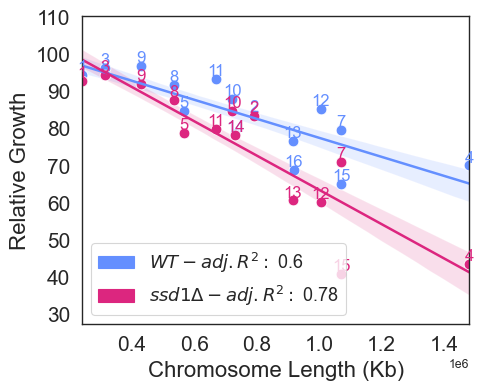

meta NOT subset; don't know how to subset; dropped


Parameters WT:  [ 1.02953718e+02 -2.55908942e-05]
R2 WT:  0.6109406689782395
Adjusted R2 WT:  0.6042327494778643
F p-value WT:  1.703400074984191e-13
Parameters ssd1:  [ 1.09480286e+02 -4.61224626e-05]
R2 ssd1:  0.779704120918844
Adjusted R2 ssd1:  0.7756245676025263
F p-value ssd1:  2.2221562023517256e-19


In [26]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m0_wt, m0_ssd1 = Fitlin_mean2(RG_WT, RG_ssd1, 'Chr length', 'MEAN RG', ['Chromosome Length (Kb)','Relative Growth'], filenamesvg='plots/model0_chrL_melted_final.pdf')

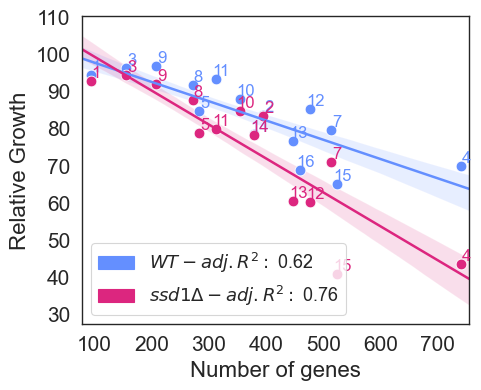

meta NOT subset; don't know how to subset; dropped


Parameters WT:  [ 1.02868196e+02 -5.20096372e-02]
R2 WT:  0.6307560820914563
Adjusted R2 WT:  0.6243898076447573
F p-value WT:  3.6844149898913977e-14
Parameters ssd1:  [ 1.08459627e+02 -9.15425815e-02]
R2 ssd1:  0.7650445311970104
Adjusted R2 ssd1:  0.7606935039969551
F p-value ssd1:  1.2768744163565084e-18


In [27]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m0_wt, m0_ssd1 = Fitlin_mean2(RG_WT, RG_ssd1, 'verified & uncharacterized', 'MEAN RG', ['Number of genes','Relative Growth'], filenamesvg='plots/model0_numbergenes_melted_final.pdf')

In [28]:
RG_WT.columns

Index(['Chromosome', 'MEAN RG', 'verified genes', 'dubious genes',
       'uncharacterized genes', 'ARS', 'ltr', 'ncRNA', 'Retrotransposon',
       'snoRNA', 'tRNA', 'rRNA', 'snRNA', 'Total Features', 'Chr length',
       'verified & uncharacterized', 'total genes'],
      dtype='object')

Parameters:  [17348.41287218  1994.93211165]
R2:  0.9947682777211767
Adjusted R2:  0.9946780756129211
F p-value:  7.246877954375068e-68


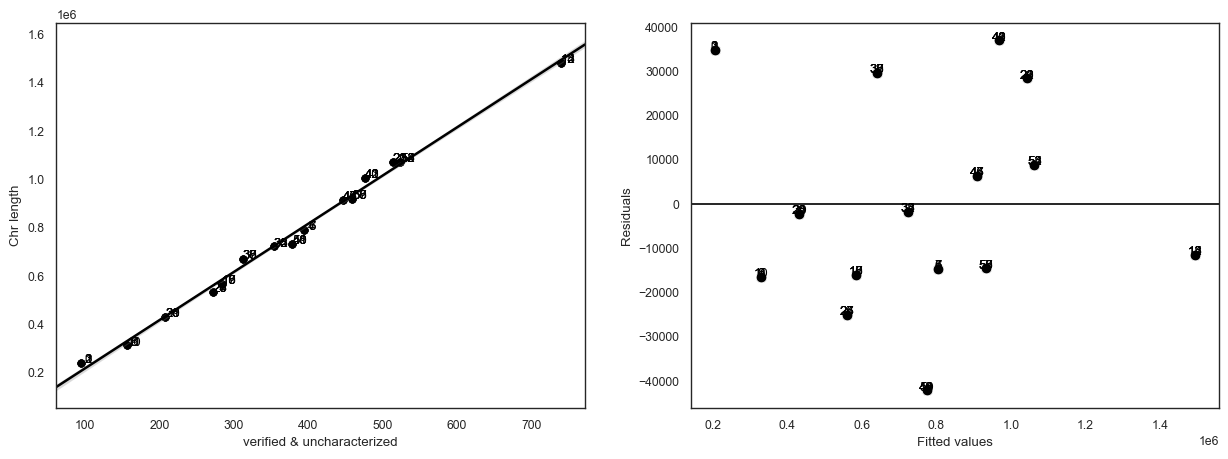

In [29]:
Fitlin(RG_WT, 'verified & uncharacterized', 'Chr length')

# Model 1: Verified Genes 

Parameters WT:  [ 1.02868196e+02 -5.20096372e-02]
R2 WT:  0.6307560820914563
Adjusted R2 WT:  0.6243898076447573
F p-value WT:  3.6844149898913977e-14


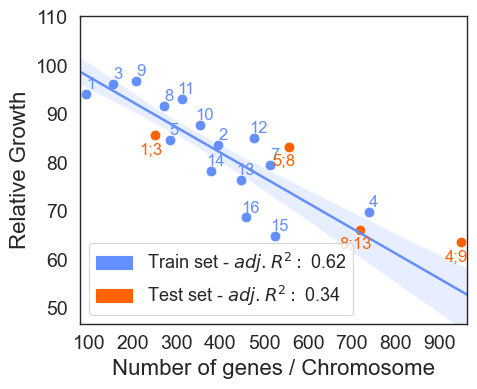

meta NOT subset; don't know how to subset; dropped



R2 score of test set:  0.3997728864469111
Adjusted R2 of test set:  0.34


In [30]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
Fitlin_mean_1test(RG_WT, test_WT,  'verified & uncharacterized', 'MEAN RG', ['Number of genes / Chromosome','Relative Growth'], filenamesvg='plots/model1_WT_melted_test.pdf')

# Model 2: Moby score
Impute missing genes that are missing and not significant genes (that will be model 2 for the paper

### Distinguish genes missing from library or from Auguste's dataset

In [31]:
sign = genes[genes.FDR < 0.05]
neg = sign[sign.logFC < 0]
pos = sign[sign.logFC > 0]
print('toxic genes: ', neg.shape[0])
print('beneficial genes: ', pos.shape[0])

toxic genes:  1229
beneficial genes:  1115


In [32]:
full_moby = pd.read_csv('datasets/MoBY-ORF_v1_0.csv', sep='\t', index_col=0)
missing_from_library = set(genes.index) - set(full_moby.index)
len(missing_from_library)

848

In [33]:
gene_moby = genes.dropna(subset='logFC')
missing_from_experiment = set(full_moby.index) - set(gene_moby.index)
len(missing_from_experiment)

624

In [34]:
# remove mithochondrial
genes = genes[genes['Chromosome'] != 'mitoch']
# get chromosome as interger
genes['Chromosome'] = genes['Chromosome'].apply(int)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
quant025 = genes['logFC'].quantile(0.025)
mean1 = genes['logFC'].mean()
# Impute missing genes
genes['model2'] = genes['logFC']
tofill = list(genes[np.isnan(genes['model2'])].index)
for ind in tofill:
    if ind in full_moby.index:
        genes['model2'][ind] = quant025
    else:
        genes['model2'][ind] = mean1
        
# not significant values are replaced by mean(moby logFC)
genes.loc[genes.FDR > 0.05, 'model2'] = moby[moby.Label == 'Toxic'].logFC.max() # test FDR, 0.05

G = genes.groupby(['Chromosome']).sum()

RG_WT = pd.merge(RG_WT, G[['model2']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2']] , on="Chromosome")
RG_WT['model2-'] = RG_WT['model2'] *-1
RG_ssd1['model2-'] = RG_ssd1['model2'] *-1

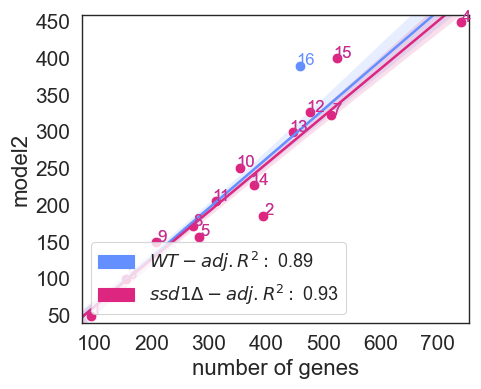

Parameters WT:  [-5.52858877  0.66987441]
R2 WT:  0.8933149808289795
Adjusted R2 WT:  0.8914755839467206
F p-value WT:  7.194345684628192e-30
Parameters ssd1:  [-3.84467364  0.6483795 ]
R2 ssd1:  0.9290715408937361
Adjusted R2 ssd1:  0.9277580509102867
F p-value ssd1:  1.0502002853420113e-32


(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1db085ea2f0>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1db085e97b0>)

In [37]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
Fitlin_mean2(RG_WT, RG_ssd1,  'verified & uncharacterized', 'model2-', ['number of genes', 'model2'])

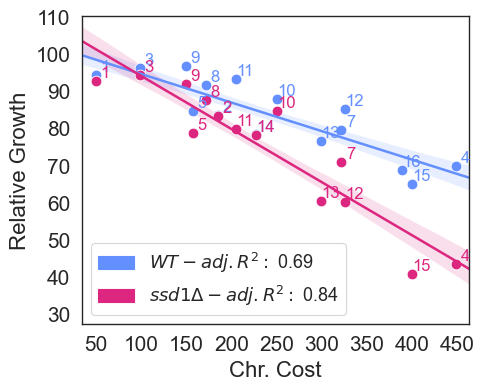

meta NOT subset; don't know how to subset; dropped


Parameters WT:  [ 1.02276538e+02 -7.69785825e-02]
R2 WT:  0.6940899910702405
Adjusted R2 WT:  0.6888156805714516
F p-value WT:  1.5021993647635522e-16
Parameters ssd1:  [108.38524078  -0.14318052]
R2 ssd1:  0.8468718402802311
Adjusted R2 ssd1:  0.8440361336187538
F p-value ssd1:  1.1612318869426742e-23


In [38]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m3_wt, m3_ssd1 = Fitlin_mean2(RG_WT, RG_ssd1,  'model2-', 'MEAN RG', ['Chr. Cost','Relative Growth'], filenamesvg='plots/model2_chr_cost_melted_final.pdf')

Parameters WT:  [ 1.02276538e+02 -7.69785825e-02]
R2 WT:  0.6940899910702405
Adjusted R2 WT:  0.6888156805714516
F p-value WT:  1.5021993647635522e-16


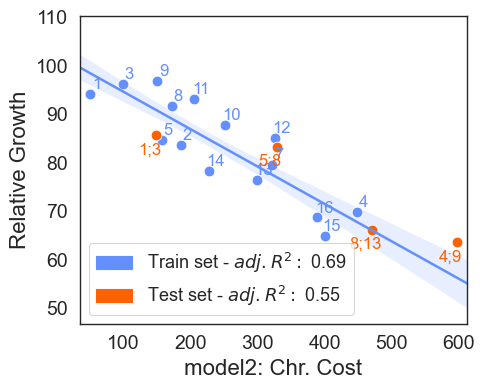

meta NOT subset; don't know how to subset; dropped



R2 score of test set:  0.5896689252845819
Adjusted R2 of test set:  0.549


In [39]:
test_WT = Chr_to_disomes(test_WT, G, 'model2')
test_ssd1 = Chr_to_disomes(test_ssd1, G, 'model2')
test_WT['model2-'] = test_WT['model2']*-1
test_ssd1['model2-'] = test_ssd1['model2']*-1

sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
Fitlin_mean_1test(RG_WT, test_WT,  'model2-', 'MEAN RG', ['model2: Chr. Cost','Relative Growth'], filenamesvg='plots/model2_melted_final_testWT.pdf')

In [40]:
RG_WT['m2/gene number'] = RG_WT['model2-']/RG_WT['verified & uncharacterized']

In [41]:
Label = []
Num = []
for index, row in genes.iterrows():
    if row['logFC'] < 0 and row['FDR'] <= 0.05:
        Label.append('Toxic')
        Num.append(1)
    else:
        Label.append('Neutral')
        Num.append(0)
genes['Label'] = Label
genes['Numeric Label'] = Num

# model2_2: no beneficial scores
### Positive scores are replaced by 0

In [42]:
genes['model2_2'] = genes['model2']
genes.loc[genes['model2_2'] > 0, 'model2_2'] = 0

G = genes.groupby(['Chromosome']).sum()

RG_WT = pd.merge(RG_WT, G[['model2_2']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2_2']] , on="Chromosome")
RG_WT['model2_2-'] = RG_WT['model2_2'] *-1
RG_ssd1['model2_2-'] = RG_ssd1['model2_2'] *-1

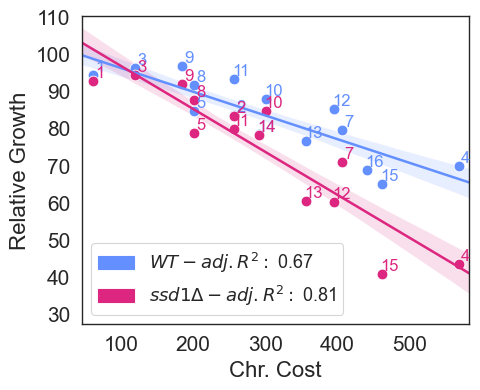

meta NOT subset; don't know how to subset; dropped


Parameters WT:  [ 1.02557873e+02 -6.38552953e-02]
R2 WT:  0.677442707687546
Adjusted R2 WT:  0.6718813750614692
F p-value WT:  7.065355600368604e-16
Parameters ssd1:  [108.29872537  -0.11572097]
R2 ssd1:  0.8183198254393029
Adjusted R2 ssd1:  0.8149553777622529
F p-value ssd1:  1.1936278805593306e-21


In [43]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m3_wt_2, m3_ssd1_2 = Fitlin_mean2(RG_WT, RG_ssd1,  'model2_2-', 'MEAN RG', ['Chr. Cost','Relative Growth'], filenamesvg='plots/model2_2_chr_cost_WOpos_val.pdf')

## Nested model: 2 vs 2-2
### 1) sum(negative-neutral genes) + sum(positive genes)

In [44]:
genes['model2_neg'] = genes['model2']
genes.loc[genes['model2_neg'] > 0, 'model2_neg'] = 0
genes['model2_pos'] = genes['model2']
genes.loc[genes['model2_pos'] < 0, 'model2_pos'] = 0

G = genes.groupby(['Chromosome']).sum()

RG_WT = pd.merge(RG_WT, G[['model2_neg']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2_neg']] , on="Chromosome")
RG_WT['model2_neg-'] = RG_WT['model2_neg'] *-1
RG_ssd1['model2_neg-'] = RG_ssd1['model2_neg'] *-1

RG_WT = pd.merge(RG_WT, G[['model2_pos']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2_pos']] , on="Chromosome")
RG_WT['model2_pos-'] = RG_WT['model2_pos'] *-1
RG_ssd1['model2_pos-'] = RG_ssd1['model2_pos'] *-1

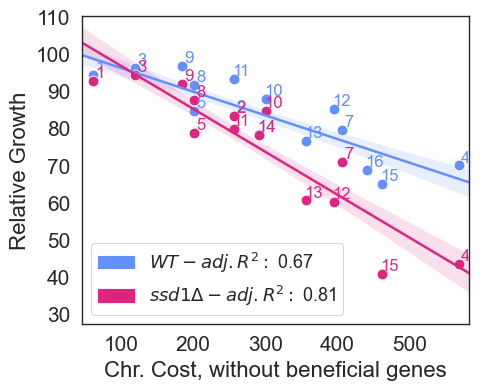

meta NOT subset; don't know how to subset; dropped


Parameters WT:  [ 1.02557873e+02 -6.38552953e-02]
R2 WT:  0.677442707687546
Adjusted R2 WT:  0.6718813750614692
F p-value WT:  7.065355600368604e-16
Parameters ssd1:  [108.29872537  -0.11572097]
R2 ssd1:  0.8183198254393029
Adjusted R2 ssd1:  0.8149553777622529
F p-value ssd1:  1.1936278805593306e-21


In [45]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m2_wt_neg, m2_ssd1_neg = Fitlin_mean2(RG_WT, RG_ssd1, 'model2_neg-', 'MEAN RG', ['Chr. Cost, without beneficial genes','Relative Growth'], filenamesvg='plots/model2_neg_chr_cost_WOpos_val.pdf')

In [46]:
genes.to_csv('result_datasets/Moby_imputed_model2.csv')

In [47]:
# full model
feat =  ['model2_neg-', 'model2_pos-']
m2_2WT = ols_pval(RG_WT, feat , ['MEAN RG'])
m2_2WT_llf = m2_2WT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_WT, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m2_2WT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     65.09
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           1.92e-15
Time:                        14:21:28   Log-Likelihood:                -189.78
No. Observations:                  60   AIC:                             385.6
Df Residuals:                      57   BIC:                             391.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.7756      6.238     17.597      0.0

In [48]:
RG_WT.head()

,Chromosome,MEAN RG,verified genes,dubious genes,uncharacterized genes,ARS,ltr,ncRNA,Retrotransposon,snoRNA,...,total genes,model2,model2-,m2/gene number,model2_2,model2_2-,model2_neg,model2_neg-,model2_pos,model2_pos-
0,1,96.033034,78,18,16,11,12,1.0,2.0,1.0,...,112,-49.563163,49.563163,0.527268,-60.844800,60.844800,-60.844800,60.844800,11.281637,-11.281637
1,1,95.155896,78,18,16,11,12,1.0,2.0,1.0,...,112,-49.563163,49.563163,0.527268,-60.844800,60.844800,-60.844800,60.844800,11.281637,-11.281637
2,1,96.032143,78,18,16,11,12,1.0,2.0,1.0,...,112,-49.563163,49.563163,0.527268,-60.844800,60.844800,-60.844800,60.844800,11.281637,-11.281637
3,1,89.550080,78,18,16,11,12,1.0,2.0,1.0,...,112,-49.563163,49.563163,0.527268,-60.844800,60.844800,-60.844800,60.844800,11.281637,-11.281637
4,2,82.093023,360,42,35,23,16,2.0,1.0,2.0,...,437,-185.298649,185.298649,0.469111,-256.944132,256.944132,-256.944132,256.944132,71.645483,-71.645483


In [49]:
# full model
feat =  ['model2_neg-', 'model2_pos-']
m2_2ssd1 = ols_pval(RG_ssd1, feat , ['MEAN RG'])
m2_2ssd1_llf = m2_2ssd1.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_ssd1, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m2_2ssd1_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     159.8
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           3.61e-23
Time:                        14:21:29   Log-Likelihood:                -183.43
No. Observations:                  56   AIC:                             372.9
Df Residuals:                      53   BIC:                             378.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.0824      8.489     15.677      0.0

## Nested model: Detrimental vs neutral+positive
### 1) sum(negative) + sum(positive genes+ -neutral genes)

In [50]:
genes['model2_T'] = genes['model2']
genes.loc[genes['model2'] >= mean1, 'model2_T'] = 0
genes['model2_NB'] = genes['model2']
genes.loc[genes['model2'] < mean1, 'model2_NB'] = 0

G = genes.groupby(['Chromosome']).sum()

RG_WT = pd.merge(RG_WT, G[['model2_T']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2_T']] , on="Chromosome")

RG_WT['model2_T-'] = RG_WT['model2_T'] *-1
RG_ssd1['model2_T-'] = RG_ssd1['model2_T'] *-1

RG_WT = pd.merge(RG_WT, G[['model2_NB']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2_NB']] , on="Chromosome")
RG_WT['model2_NB-'] = RG_WT['model2_NB'] *-1
RG_ssd1['model2_NB-'] = RG_ssd1['model2_NB'] *-1

In [51]:
genes['Nb toxic'] = 0
genes.loc[genes['model2_T'] != 0, 'Nb toxic'] = 1

G = genes.groupby(['Chromosome']).sum()

RG_WT = pd.merge(RG_WT, G[['Nb toxic']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['Nb toxic']] , on="Chromosome")

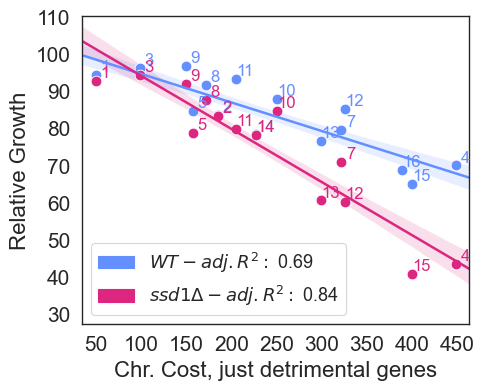

Parameters WT:  [ 1.02276538e+02 -7.69785825e-02]
R2 WT:  0.6940899910702405
Adjusted R2 WT:  0.6888156805714516
F p-value WT:  1.5021993647635522e-16
Parameters ssd1:  [108.38524078  -0.14318052]
R2 ssd1:  0.8468718402802311
Adjusted R2 ssd1:  0.8440361336187538
F p-value ssd1:  1.1612318869426742e-23


In [52]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m2_wt_neg, m2_ssd1_neg = Fitlin_mean2(RG_WT, RG_ssd1,  'model2-', 'MEAN RG', ['Chr. Cost, just detrimental genes','Relative Growth'])

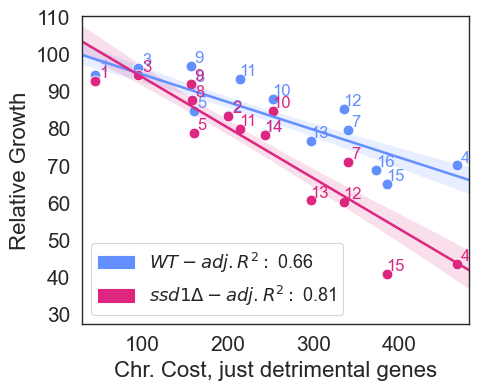

Parameters WT:  [ 1.01890605e+02 -7.45040014e-02]
R2 WT:  0.6676048699982797
Adjusted R2 WT:  0.6618739194810087
F p-value WT:  1.7003752316035062e-15
Parameters ssd1:  [107.3281472   -0.13618822]
R2 ssd1:  0.8142494256536865
Adjusted R2 ssd1:  0.8108096002028289
F p-value ssd1:  2.176287145960645e-21


In [53]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m2_wt_neg, m2_ssd1_neg = Fitlin_mean2(RG_WT, RG_ssd1,  'model2_T-', 'MEAN RG', ['Chr. Cost, just detrimental genes','Relative Growth'])

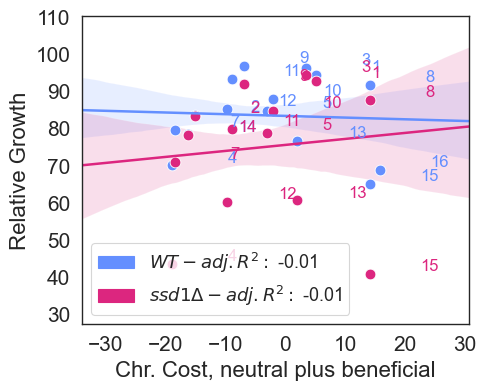

Parameters WT:  [ 8.32635950e+01 -4.57541598e-02]
R2 WT:  0.002562497931763774
Adjusted R2 WT:  -0.01463470037975756
F p-value WT:  0.7008987558825902
Parameters ssd1:  [75.4417955   0.16183147]
R2 ssd1:  0.010379830552772362
Adjusted R2 ssd1:  -0.007946468881435687
F p-value ssd1:  0.4549653917608901


In [54]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m2_wt_neg, m2_ssd1_neg = Fitlin_mean2(RG_WT, RG_ssd1,  'model2_NB-', 'MEAN RG', ['Chr. Cost, neutral plus beneficial','Relative Growth'])

In [55]:
RG_WT.columns# full model
feat =  ['model2_NB-', 'model2_T-']
m2_2WT = ols_pval(RG_WT, feat , ['MEAN RG'])
m2_2WT_llf = m2_2WT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_WT, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m2_2WT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     69.08
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           5.84e-16
Time:                        14:21:33   Log-Likelihood:                -188.53
No. Observations:                  60   AIC:                             383.1
Df Residuals:                      57   BIC:                             389.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.1954      1.996     51.210      0.0

In [56]:
# full model
feat =  ['model2_NB-', 'model2_T-']
m2_2ssd1 = ols_pval(RG_ssd1, feat , ['MEAN RG'])
m2_2ssd1_llf = m2_2ssd1.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_ssd1, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m2_2ssd1_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     178.1
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           3.02e-24
Time:                        14:21:33   Log-Likelihood:                -180.81
No. Observations:                  56   AIC:                             367.6
Df Residuals:                      53   BIC:                             373.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.8259      2.449     44.842      0.0

# Nested model: model2 /model1 

In [57]:
RG_WT['model2-/nb genes'] = RG_WT['model2-'] / RG_WT['verified & uncharacterized']
RG_ssd1['model2-/nb genes'] = RG_ssd1['model2-'] / RG_ssd1['verified & uncharacterized']

In [58]:
ols_pval(RG_WT, ['verified & uncharacterized', 'model2-/nb genes'], 'MEAN RG')

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     53.95
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           7.11e-14
Time:                        14:21:33   Log-Likelihood:                -193.59
No. Observations:                  60   AIC:                             393.2
Df Residuals:                      57   BIC:                             399.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.4803      2.075     48.429      0.0

In [59]:
ols_pval(RG_ssd1, ['verified & uncharacterized', 'model2-/nb genes'], 'MEAN RG')

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     104.9
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           3.77e-19
Time:                        14:21:33   Log-Likelihood:                -193.21
No. Observations:                  56   AIC:                             392.4
Df Residuals:                      53   BIC:                             398.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.5961      2.830     37.315      0.0

In [60]:
# full model
feat =  ['verified & uncharacterized', 'model2-/nb genes']
m3WT = ols_pval(RG_WT, feat , ['MEAN RG'])
m3WT_llf = m3WT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_WT, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m3WT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     53.95
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           7.11e-14
Time:                        14:21:33   Log-Likelihood:                -193.59
No. Observations:                  60   AIC:                             393.2
Df Residuals:                      57   BIC:                             399.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.4803      2.075     48.429      0.0

In [61]:
# full model
feat =  ['verified & uncharacterized', 'model2-/nb genes']
m3ssd1 = ols_pval(RG_ssd1, feat , ['MEAN RG'])
m3ssd1_llf = m3ssd1.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_ssd1, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m3ssd1_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     104.9
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           3.77e-19
Time:                        14:21:33   Log-Likelihood:                -193.21
No. Observations:                  56   AIC:                             392.4
Df Residuals:                      53   BIC:                             398.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.5961      2.830     37.315      0.0

# Number of genes and normalized detrimental score only

In [62]:
RG_WT['model2_T/nb genes'] = RG_WT['model2_T-'] / RG_WT['Nb toxic']
RG_ssd1['model2_T/nb genes'] = RG_ssd1['model2_T-'] / RG_ssd1['Nb toxic']

In [63]:
ols_pval(RG_WT, ['verified & uncharacterized', 'model2_T/nb genes'], 'MEAN RG')

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     55.45
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           4.26e-14
Time:                        14:21:33   Log-Likelihood:                -193.05
No. Observations:                  60   AIC:                             392.1
Df Residuals:                      57   BIC:                             398.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.3556      2.220     45.647      0.0

In [64]:
# full model
feat =  ['verified & uncharacterized', 'model2_T/nb genes']
m3WT = ols_pval(RG_WT, feat , ['MEAN RG'])
m3WT_llf = m3WT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_WT, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m3WT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     55.45
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           4.26e-14
Time:                        14:21:33   Log-Likelihood:                -193.05
No. Observations:                  60   AIC:                             392.1
Df Residuals:                      57   BIC:                             398.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.3556      2.220     45.647      0.0

In [65]:
# full model
feat =  ['verified & uncharacterized', 'model2-/nb genes']
m3ssd1 = ols_pval(RG_ssd1, feat , ['MEAN RG'])
m3ssd1_llf = m3ssd1.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_ssd1, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m3ssd1_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     104.9
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           3.77e-19
Time:                        14:21:33   Log-Likelihood:                -193.21
No. Observations:                  56   AIC:                             392.4
Df Residuals:                      53   BIC:                             398.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.5961      2.830     37.315      0.0

# Shuffle Moby score

In [66]:
RGs = RG_WT[['Chromosome', 'MEAN RG', 'verified & uncharacterized', 'model2-']]
RGs = RGs.rename(columns={"MEAN RG": "RG WT"})
RGs['RG ssd1'] = RG_ssd1['MEAN RG']

In [67]:
orf_num = list(RGs['verified & uncharacterized'])
r2s = []
for x in range(10000):
    logFC = list(genes['model2'])
    random_scores = []
    for num in orf_num:
        ind = random.sample(range(len(logFC)), num)
        select = [logFC[i] for i in ind]
        random_scores.append(sum(select))
    X = list(RGs['RG WT'])
    X = sm.add_constant(X)
    results = sm.OLS(random_scores, X).fit()
    r2s.append(results.rsquared)

In [68]:
RGs_drop16 = RGs.dropna()
orf_num = list(RGs_drop16['verified & uncharacterized'])

r2s_ssd1 = []
for x in range(10000):
    logFC = list(genes['model2'])
    random_scores = []
    for num in orf_num:
        ind = random.sample(range(len(logFC)), num)
        select = [logFC[i] for i in ind]
        #remain = [x for i,x in enumerate(logFC) if not i in ind]
        #logFC = remain
        random_scores.append(sum(select))
    X = list(RGs_drop16['RG ssd1'])
    X = sm.add_constant(X)
    results = sm.OLS(random_scores, X).fit()
    r2s_ssd1.append(results.rsquared)

Parameters:  [ 1.02276538e+02 -7.69785825e-02]
R2:  0.6940899910702405
Adjusted R2:  0.6888156805714516
F p-value:  1.5021993647635522e-16
Parameters:  [108.38524078  -0.14318052]
R2:  0.8468718402802311
Adjusted R2:  0.8440361336187538
F p-value:  1.1612318869426742e-23
Parameters:  [ 1.02868196e+02 -5.20096372e-02]
R2:  0.6307560820914563
Adjusted R2:  0.6243898076447573
F p-value:  3.6844149898913977e-14
Parameters:  [ 1.08459627e+02 -9.15425815e-02]
R2:  0.7650445311970104
Adjusted R2:  0.7606935039969551
F p-value:  1.2768744163565084e-18


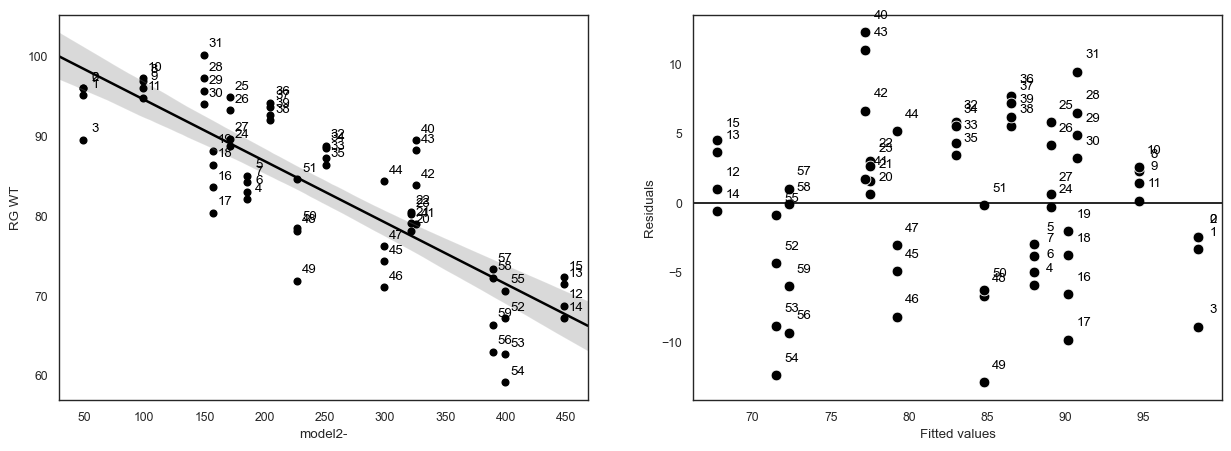

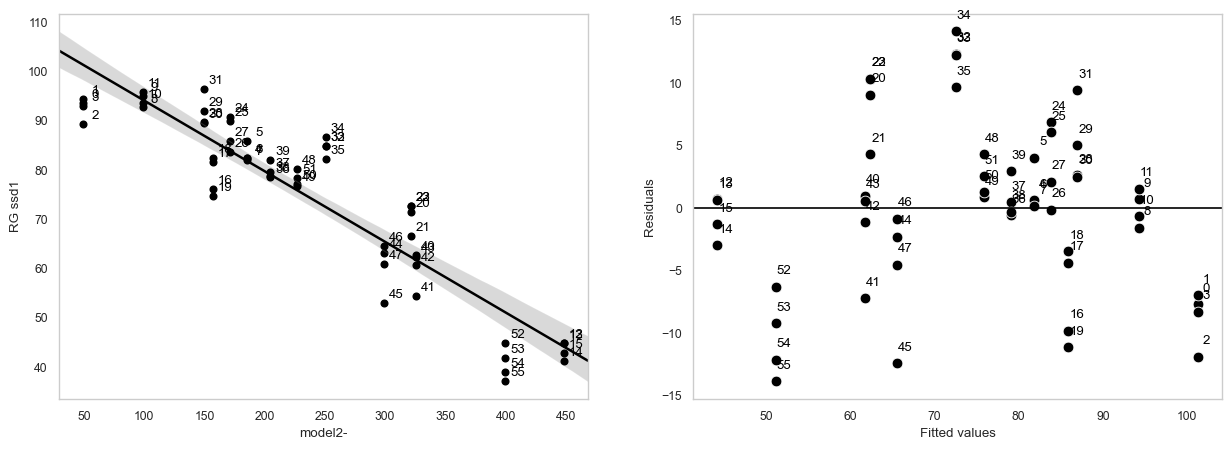

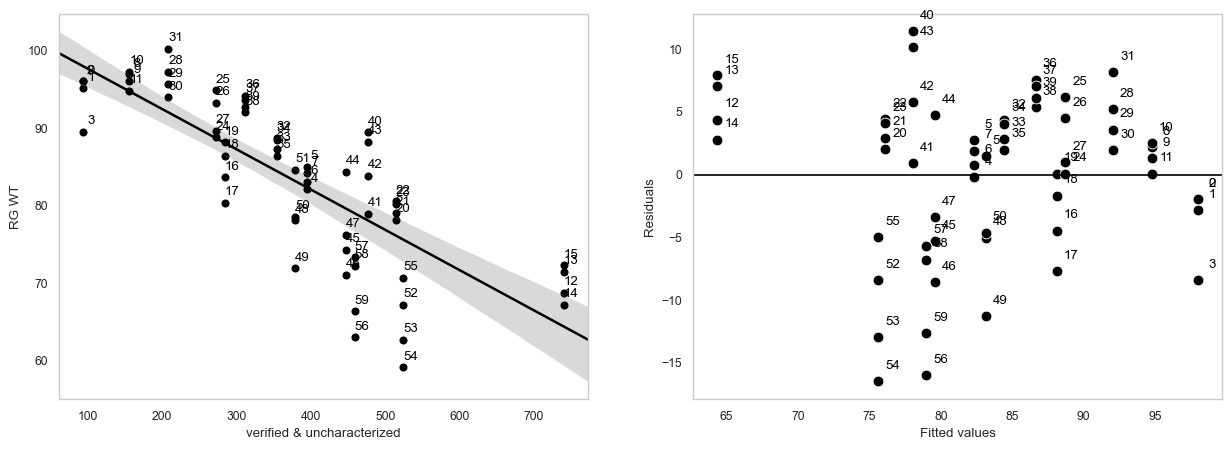

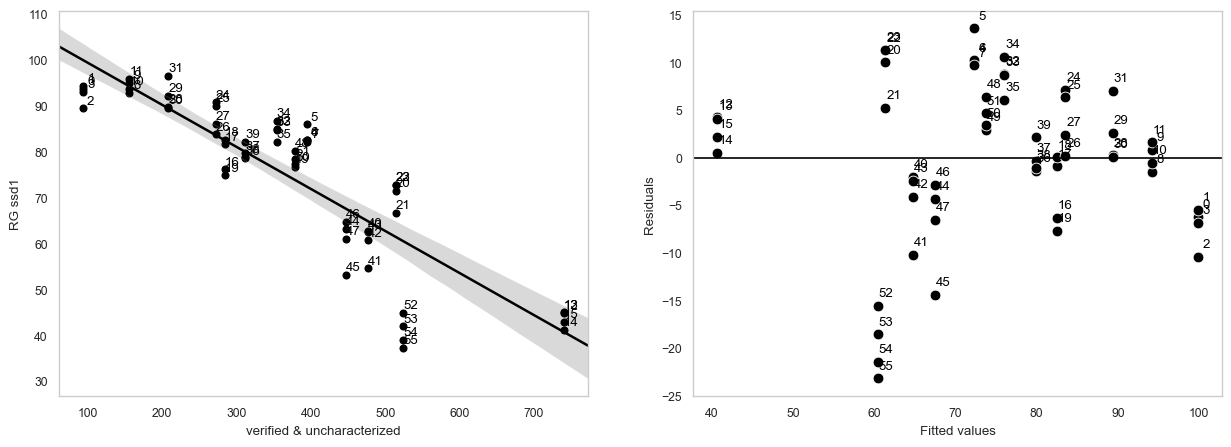

In [69]:
res_wt_moby = Fitlin(RGs, 'model2-', 'RG WT')
res_ssd1_moby = Fitlin(RGs_drop16, 'model2-', 'RG ssd1')
res_wt_orf = Fitlin(RGs, 'verified & uncharacterized', 'RG WT')
res_ssd1_orf = Fitlin(RGs_drop16, 'verified & uncharacterized', 'RG ssd1')

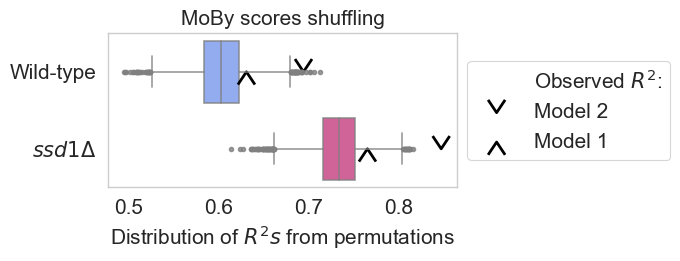

In [70]:
df_r2s = pd.DataFrame({"Wild-type": r2s,  r'$ssd1\Delta$ ': r2s_ssd1})

#sns.set(rc={'figure.figsize':(5,2)})
#sns.set_style("whitegrid")

PROPS = {
    'boxprops':{'edgecolor':'grey', 'alpha':0.8},
    'medianprops':{'color':'grey', 'alpha':0.8},
    'whiskerprops':{'color':'grey', 'alpha':0.8},
    'capprops':{'color':'grey', 'alpha':0.8},
    'flierprops': {'marker':'o', 'markerfacecolor':'grey', 'markersize':3,  'markeredgecolor':'grey', 'alpha':0.8}}

my_pal = {"Wild-type": '#648FFF',  r'$ssd1\Delta$ ': '#DC267F'}

fig, ax = plt.subplots(figsize=(4.5, 2))
ax = sns.boxplot(data=df_r2s, orient="h", **PROPS, palette = my_pal)

ax.grid(False)
ax.axes.set_title("MoBy scores shuffling",fontsize=15)
ax.set_xlabel(r"Distribution of $R^2s$ from permutations",fontsize=15)
ax.tick_params(labelsize=15)
plt.plot([], [], ' ', label=r'Observed $R^2$:')
plt.scatter( res_wt_moby.rsquared,0,  fc='none', ec='black',marker=7, s=150, linewidths=2, label='Model 2')
plt.scatter( res_wt_orf.rsquared,0, fc='none', ec='black', marker=6, s=150, linewidths=2, label = 'Model 1')

plt.scatter( res_ssd1_moby.rsquared,1, fc='none', ec='black', marker=7, s=150, linewidths=2)
plt.scatter( res_ssd1_orf.rsquared,1, fc='none', ec='black', marker=6, s=150, linewidths=2)
#ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
#ax.axvline(0, color='black')
# show plot
plt.savefig('plots/model2_melted_random_scores_distribution_to_chromosomes.svg',  bbox_inches='tight')
plt.show()

In [71]:
df_r2s[df_r2s['Wild-type'] > res_wt_orf.rsquared].shape[0] / df_r2s.shape[0]

0.1628

In [72]:
df_r2s[df_r2s['$ssd1\Delta$ '] > res_ssd1_orf.rsquared].shape[0] / df_r2s.shape[0]

0.1082

In [73]:
df_r2s.columns

Index(['Wild-type', '$ssd1\Delta$ '], dtype='object')

In [74]:
len(df_r2s[df_r2s['Wild-type'] >= res_wt_moby.rsquared])/100

0.05

In [75]:
RG_WT.to_csv('result_datasets/230601_RG_WT_model1_2_melted.csv')
RG_ssd1.to_csv('result_datasets/230601_RG_ssd1_model1_2_melted.csv')

In [76]:
test_WT.to_csv('result_datasets/230601_RG_TEST_WT_model1_2_melted.csv')
test_ssd1.to_csv('result_datasets/230601_RG_TEST_ssd1_model1_2_melted.csv')

# Multi-linear Model:

## Load lasso and Spearman correlation

In [88]:
normFeat = pd.read_csv('datasets/yps1009_features_normTotFeat.csv', index_col=0)

In [89]:
normFeat['Chromosome'] = list(normFeat.index)

In [90]:
normFeat

,verified genes,dubious genes,uncharacterized genes,ARS,ltr,ncRNA,snoRNA,tRNA,rRNA,snRNA,...,Ribo_profilling_trans_time,Ribo_profilling_delay_time,IDR ratio,protein half-life (hr),mRNA half-life (min),is in complex,is essential,gene number,Chr length kb,Chromosome
Chromosome,,,,,,,,,,,,,,,,,,,,,
1,250.977273,57.917832,51.482517,35.394231,38.611888,3.217657,3.217657,12.870629,0.000000,0.000000,...,37246.275724,2372.439894,47.023298,1520.664860,8842.122378,119.053322,41.829545,360.377622,239.671,1
2,334.636364,39.040909,32.534091,21.379545,14.872727,1.859091,1.859091,12.084091,0.000000,0.929545,...,41645.528918,1959.645418,60.001917,39370.897727,11913.054545,108.756818,69.715909,406.211364,790.641,2
3,278.989819,35.394231,45.804299,35.394231,31.230204,0.000000,8.328054,20.820136,0.000000,0.000000,...,32307.653973,1435.681609,46.467881,23229.025452,9063.005090,95.772624,31.230204,360.188348,312.008,3
4,345.602738,37.156112,31.048258,22.395465,6.107854,0.000000,2.035951,14.251659,0.000000,0.000000,...,44340.803778,1900.395143,72.496156,17751.205130,11564.712528,121.139104,90.090846,413.807107,1482.091,4
5,271.744412,55.215000,35.727353,25.983529,36.810000,3.247941,5.413235,21.652941,0.000000,1.082647,...,35678.262476,1514.332003,59.232211,45216.321353,8630.862353,71.454706,48.719118,362.686765,567.805,5
6,274.952744,22.445122,36.473323,39.278963,39.278963,11.222561,0.000000,30.862043,0.000000,0.000000,...,37879.111660,1523.788107,67.095136,1950.761662,10686.683689,95.391768,78.557927,333.871189,299.359,6
7,302.610618,26.797053,33.332919,18.954013,45.751065,1.307173,3.921520,24.182706,0.000000,1.307173,...,35641.074659,1650.189294,55.942819,62382.035103,10153.468572,105.881037,71.894531,362.740589,1071.065,7
8,313.842486,31.916185,47.874277,19.947616,25.266980,2.659682,2.659682,14.628251,0.000000,0.000000,...,40520.265812,2006.111754,56.367014,28932.686597,9812.897038,89.099350,51.863801,393.632948,534.968,8
9,309.039179,42.922108,48.072761,27.470149,10.301306,3.433769,1.716884,17.168843,0.000000,0.000000,...,35704.053508,1703.757031,61.160329,1775.945149,10782.033582,89.277985,65.241604,400.034049,430.085,9


In [91]:
RG_WT.columns

Index(['Chromosome', 'MEAN RG', 'model2', 'model2-', 'model2_2', 'model2_2-',
       'model2_neg', 'model2_neg-', 'model2_pos', 'model2_pos-'],
      dtype='object')

In [92]:
RG_WT = RG_WT[['Chromosome', 'MEAN RG', 'model2', 'model2-', 'model2_2',
       'model2_2-', 'model2_neg', 'model2_neg-', 'model2_pos', 'model2_pos-']]

RG_ssd1 = RG_ssd1[['Chromosome', 'MEAN RG', 'model2', 'model2-', 'model2_2',
       'model2_2-', 'model2_neg', 'model2_neg-', 'model2_pos', 'model2_pos-']]

In [93]:
normFeat.drop('Chromosome', axis=1, inplace=True)

In [94]:
RG_WT = pd.merge(RG_WT, normFeat , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, normFeat , on="Chromosome")

In [95]:
meanRG_WT = RG_WT.groupby('Chromosome', as_index=False).mean()

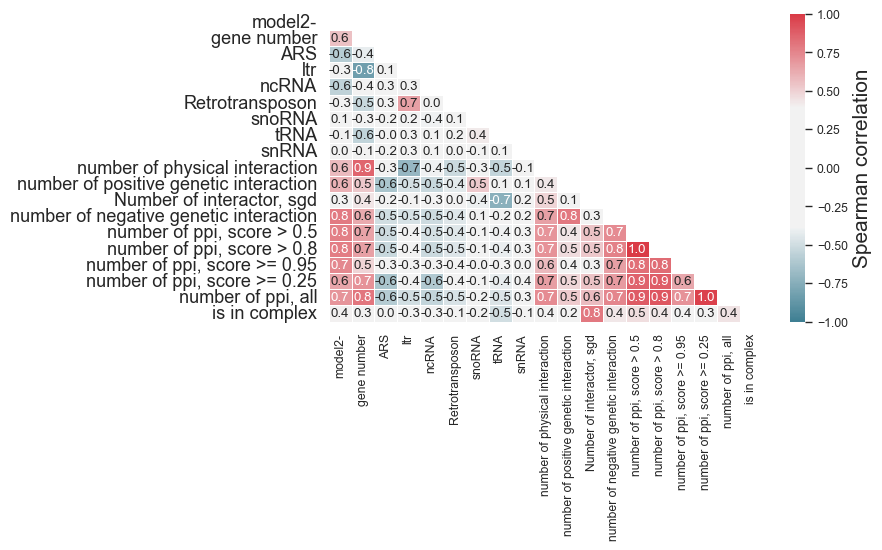

In [96]:
tmp = meanRG_WT[['model2-', 'gene number', 'ARS', 'ltr', 'ncRNA',
       'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA',  'number of physical interaction',
       'number of positive genetic interaction', 'Number of interactor, sgd',
       'number of negative genetic interaction', 'number of ppi, score > 0.5',
       'number of ppi, score > 0.8', 'number of ppi, score >= 0.95',
       'number of ppi, score >= 0.25', 'number of ppi, all', 'is in complex']]
corr = tmp.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(7, 4))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5, annot=True, cbar_kws={'label': 'Spearman correlation'}, fmt=".1f")
ax.figure.axes[-1].yaxis.label.set_size(15)
plt.yticks(rotation=0, fontsize = 13) 
#plt.xticks(rotation=90) 
plt.show()

In [97]:
#RG_WT = RG_WT[['Chromosome', 'MEAN RG',  'model2-',  'ARS','ltr', 'ncRNA', 'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']]
RG_WT = RG_WT.rename(columns={'model2-': 'Model 2: Chr. cost', 'ltr': 'LTR'})

#RG_ssd1 = RG_ssd1[['Chromosome', 'MEAN RG', 'model2-', 'ARS','ltr', 'ncRNA', 'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']]
RG_ssd1 = RG_ssd1.rename(columns={'model2-': 'Model 2: Chr. cost', 'ltr': 'LTR'})

In [98]:
test_WT = test_WT[['Chromosome', 'MEAN RG',  'model2-', 'ARS','ltr', 'ncRNA', 'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']]
test_WT = test_WT.rename(columns={'model2-': 'Model 2: Chr. cost', 'ltr': 'LTR'})

test_ssd1 = test_ssd1[['Chromosome', 'MEAN RG', 'model2-', 'ARS','ltr', 'ncRNA', 'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']]
test_ssd1 = test_ssd1.rename(columns={'model2-': 'Model 2: Chr. cost', 'ltr': 'LTR'})

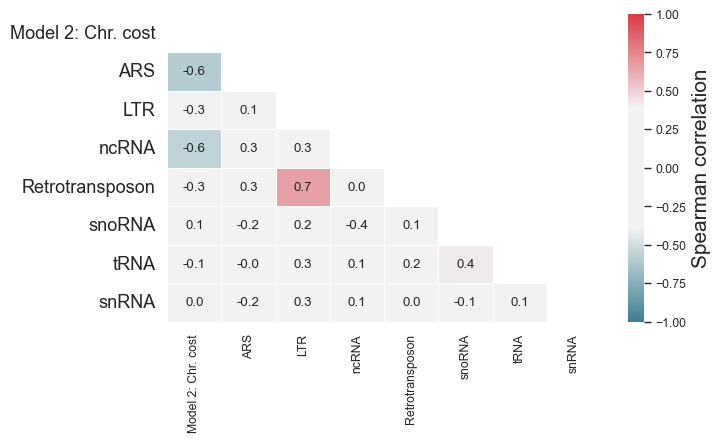

meta NOT subset; don't know how to subset; dropped


In [99]:
tmp = RG_WT[['Model 2: Chr. cost', 'ARS', 'LTR', 'ncRNA',
       'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']]
corr = tmp.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(7, 4))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5, annot=True, cbar_kws={'label': 'Spearman correlation'}, fmt=".1f")
ax.figure.axes[-1].yaxis.label.set_size(15)
plt.yticks(rotation=0, fontsize = 13) 
#plt.xticks(rotation=90) 
plt.show()
#fig.suptitle('Correlation matrix of features', fontsize=10)
fig.tight_layout()
fig.savefig('plots/non_coding_spearman_corr.pdf', bbox_inches='tight')

## Bootstrap + Lasso

In [101]:
def lasso2(RG, features, yf, alpha = 0.5):
    X = RG[features]
    y = RG[yf]
    # standardization of dependent variables (sklearn)
    X_s = preprocessing.scale(X)
    # Lasso (also regularized)
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_s, y)

    #print('R2 score: ', round(lasso_reg.score(X_s,y),3))
    #print('Intercept: ', round(lasso_reg.intercept_[0],3))
    n_v = 0
    for x in range(len(X.columns)):
    #    print(X.columns[x], round(lasso_reg.coef_[x], 3))
        if lasso_reg.coef_[x] > 0:
            n_v +=1
    adjr2 = round((1-((1-lasso_reg.score(X_s,y))*(X.shape[0]-1))/(X.shape[0]-1 -n_v)) ,3)
    return lasso_reg, adjr2

In [104]:
# For reproducibility
np.random.seed(42)

size = 4        # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]

coefs_WT = []
r2_WT = []
coefs_ssd1 = []
r2_ssd1 = []
X = ['Model 2: Chr. cost', 'ARS', 'LTR', 'ncRNA',
       'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA',
       'gene number']
for x in range(1000):
    WT= resample(RG_WT)
    ssd1= resample(RG_ssd1)
    ssd1.dropna(inplace=True)
    
    regr, r2 = lasso2(WT, X, ['MEAN RG'], alpha = 0.7)
    coefs_WT.append(regr.coef_)
    r2_WT.append(r2)
    
    regr, r2 = lasso2(ssd1, X, ['MEAN RG'], alpha = 0.7)
    coefs_ssd1.append(regr.coef_)
    r2_ssd1.append(r2)
    
coefs_WT_pd = pd.DataFrame(coefs_WT,columns=X)
coefs_ssd1_pd = pd.DataFrame(coefs_ssd1,columns=X)

coefs_WT_pd['strains'] = ['WT' for x in range(coefs_WT_pd.shape[0])]
coefs_ssd1_pd['strains'] = ['ssd1' for x in range(coefs_ssd1_pd.shape[0])]
DF = pd.concat([coefs_WT_pd, coefs_ssd1_pd])
DFmelt = pd.melt(DF, value_vars= X , id_vars='strains')

In [105]:
DF_WT = DFmelt[DFmelt['strains'] == 'WT']
wt = DF_WT[DF_WT['value'] != 0]
feat_wt = wt['variable'].value_counts().to_frame()
wt['variable'].value_counts()

variable
Model 2: Chr. cost    1000
tRNA                   999
snoRNA                 901
snRNA                  839
Retrotransposon        468
ARS                    320
ncRNA                  308
LTR                    121
gene number              4
Name: count, dtype: int64

In [106]:
DF_ssd1 = DFmelt[DFmelt['strains'] == 'ssd1']
ssd1 = DF_ssd1[DF_ssd1['value'] != 0]
feat_ssd1 = ssd1['variable'].value_counts().to_frame()
ssd1['variable'].value_counts()

variable
Model 2: Chr. cost    1000
snoRNA                 999
tRNA                   998
Retrotransposon        994
ncRNA                  389
snRNA                  259
LTR                     78
ARS                     76
Name: count, dtype: int64

In [107]:
# For reproducibility
np.random.seed(42)

size = 4        # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]

coefs_WT = []
r2_WT = []
coefs_ssd1 = []
r2_ssd1 = []
X = ['Model 2: Chr. cost', 'ARS', 'LTR', 'ncRNA',
       'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']
for x in range(1000):
    WT = resample(RG_WT)
    ssd1 = resample(RG_ssd1)
    ssd1.dropna(inplace=True)
    
    regr, r2 = lasso2(WT, X, ['MEAN RG'], alpha = 0.7)
    coefs_WT.append(regr.coef_)
    r2_WT.append(r2)
    
    regr, r2 = lasso2(ssd1, X, ['MEAN RG'], alpha = 0.7)
    coefs_ssd1.append(regr.coef_)
    r2_ssd1.append(r2)
    
coefs_WT_pd = pd.DataFrame(coefs_WT,columns=X)
coefs_ssd1_pd = pd.DataFrame(coefs_ssd1,columns=X)

coefs_WT_pd['strains'] = ['WT' for x in range(coefs_WT_pd.shape[0])]
coefs_ssd1_pd['strains'] = ['ssd1' for x in range(coefs_ssd1_pd.shape[0])]
DF = pd.concat([coefs_WT_pd, coefs_ssd1_pd])
DFmelt = pd.melt(DF, value_vars= X , id_vars='strains')

In [116]:
DF_WT = DFmelt[DFmelt['strains'] == 'WT']
wt = DF_WT[DF_WT['value'] != 0]
feat_wt = wt['variable'].value_counts().to_frame()

In [118]:
DF_ssd1 = DFmelt[DFmelt['strains'] == 'ssd1']
ssd1 = DF_ssd1[DF_ssd1['value'] != 0]
feat_ssd1 = ssd1['variable'].value_counts().to_frame()

In [120]:
feat_wt = list(feat_wt[feat_wt['count'] >= 900].index)
feat_ssd1 = list(feat_ssd1[feat_ssd1['count'] >= 900].index)

DF_WT = DF_WT[DF_WT.variable.isin(feat_wt)]
DF_ssd1= DF_ssd1[DF_ssd1.variable.isin(feat_ssd1)]

meta NOT subset; don't know how to subset; dropped


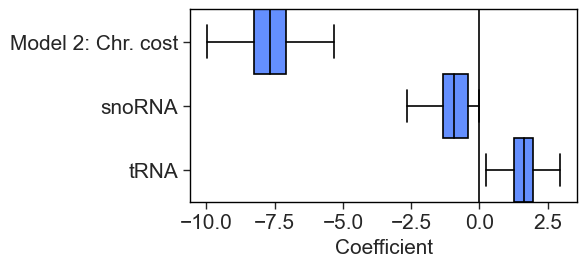

In [121]:
sns.set(rc={'figure.figsize': (5, 2.5)})

sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 1)
sns.set_style('ticks', {'axes.edgecolor': '0'})
PROPS = {
    'boxprops':{'facecolor':'#648FFF', 'edgecolor':'black'}}
    
ax = sns.boxplot(y='variable', x='value', orient='h', 
                 data=DF_WT, **PROPS,
                 width=1, showfliers = False)
ax.grid(False)
ax.set_xlabel("Coefficient", fontsize=15)
ax.set(ylabel=None)
ax.tick_params(labelsize=15)
ax.axvline(0, color='black')
plt.setp(ax.artists, edgecolor='black')
plt.setp(ax.lines, color='black')
#plt.style.use('_mpl-gallery')
plt.savefig('plots/multiWT_coeffs_bootstrap.pdf', bbox_inches='tight')
plt.show()

In [122]:
# Model3: full model
feat = ['Model 2: Chr. cost', 'snoRNA', 'tRNA']
m4WT = ols_pval(RG_WT, feat , ['MEAN RG'])

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     56.15
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           6.91e-17
Time:                        14:48:01   Log-Likelihood:                -183.80
No. Observations:                  60   AIC:                             375.6
Df Residuals:                      56   BIC:                             384.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.7249      1.787     54.136      0.0

meta NOT subset; don't know how to subset; dropped


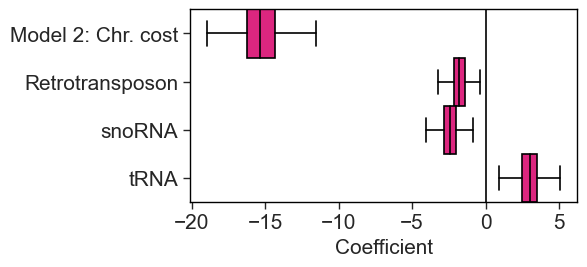

In [124]:
sns.set(rc={'figure.figsize': (5, 2.5)})

sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 1)
sns.set_style('ticks', {'axes.edgecolor': '0'})
PROPS = {
    'boxprops':{'facecolor':'#DC267F', 'edgecolor':'black'}}
    
ax = sns.boxplot(y='variable', x='value', orient='h', 
                 data=DF_ssd1, **PROPS,
                 width=1, showfliers = False)
ax.grid(False)
ax.set_xlabel("Coefficient", fontsize=15)
ax.set(ylabel=None)
ax.tick_params(labelsize=15)
ax.axvline(0, color='black')
plt.setp(ax.artists, edgecolor='black')
plt.setp(ax.lines, color='black')
#plt.style.use('_mpl-gallery')
plt.savefig('plots/multissd1_coeffs_bootstrap.pdf', bbox_inches='tight')
plt.show()

In [125]:
# full model
feat = ['Model 2: Chr. cost', 'snoRNA', 'tRNA', 'Retrotransposon']
m4ssd1 = ols_pval(RG_ssd1, feat , ['MEAN RG'])

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     209.6
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           5.48e-31
Time:                        14:48:20   Log-Likelihood:                -157.99
No. Observations:                  56   AIC:                             326.0
Df Residuals:                      51   BIC:                             336.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.3711      1.860     56.640      0.0

# Nested model, Chi-square test

In [126]:
# full model
feat = ['Model 2: Chr. cost', 'snoRNA', 'tRNA']
mtWT = ols_pval(RG_WT, feat , ['MEAN RG'])
mtWT_llf = mtWT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_WT, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     56.15
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           6.91e-17
Time:                        14:48:23   Log-Likelihood:                -183.80
No. Observations:                  60   AIC:                             375.6
Df Residuals:                      56   BIC:                             384.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.7249      1.787     54.136      0.0

In [127]:
f = []
p = []
s = []
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - mtWT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    f.append(feat[x])
    p.append(p_val)
    s.append(LR_statistic)
    print('p-value: ', '{:0.3e}'.format(p_val))

nested_WT = pd.DataFrame({'features': f, 'likelihood ratio statistic': s, 'p-value': p})

Model 2: Chr. cost LR statistic: 73.47
p-value:  1.022e-17
snoRNA LR statistic: 5.13
p-value:  2.351e-02
tRNA LR statistic: 10.66
p-value:  1.096e-03


In [128]:
nested_WT

,features,likelihood ratio statistic,p-value
0,Model 2: Chr. cost,73.470382,1.021576e-17
1,snoRNA,5.130244,2.351242e-02
2,tRNA,10.657442,1.096289e-03


In [129]:
nested_WT.to_csv('plots/model3_WT_nested_model_pval.csv', index=False)

In [130]:
nested_WT['p-value'][0]

1.0215764524969121e-17

meta NOT subset; don't know how to subset; dropped


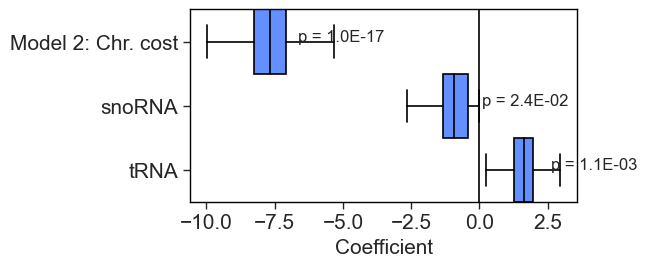

In [131]:
sns.set(rc={'figure.figsize': (5, 2.5)})

sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 1)
sns.set_style('ticks', {'axes.edgecolor': '0'})
PROPS = {
    'boxprops':{'facecolor':'#648FFF', 'edgecolor':'black'}}
    
ax = sns.boxplot(y='variable', x='value', orient='h', 
                 data=DF_WT, **PROPS,
                 width=1, showfliers = False)
ax.grid(False)
ax.set_xlabel("Coefficient", fontsize=15)
ax.set(ylabel=None)
ax.tick_params(labelsize=15)
ax.axvline(0, color='black')
plt.setp(ax.artists, edgecolor='black')
plt.setp(ax.lines, color='black')

for x in range(nested_WT.shape[0]): 
    ax.text(DF_WT[DF_WT['variable'] == nested_WT['features'][x]].value.mean() + 1, x , 'p = ' + str('%.1E' % Decimal(nested_WT['p-value'][x])), fontsize=12)
        
plt.savefig('plots/multiWT_coeffs_bootstrap_pvalue.pdf', bbox_inches='tight')
plt.show()

In [132]:
# full model ssd1
feat = ['Model 2: Chr. cost', 'snoRNA', 'tRNA', 'Retrotransposon']
mtWT = ols_pval(RG_ssd1, feat , ['MEAN RG'])
mtWT_llf = mtWT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_ssd1, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     209.6
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           5.48e-31
Time:                        14:48:28   Log-Likelihood:                -157.99
No. Observations:                  56   AIC:                             326.0
Df Residuals:                      51   BIC:                             336.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.3711      1.860     56.640      0.0

In [133]:
f = []
p = []
s = []

for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - mtWT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))
    f.append(feat[x])
    p.append(p_val)
    s.append(LR_statistic)
    
nested_ssd1 = pd.DataFrame({'features': f, 'likelihood ratio statistic': s, 'p-value': p})

Model 2: Chr. cost LR statistic: 144.56
p-value:  2.686e-33
snoRNA LR statistic: 25.93
p-value:  3.534e-07
tRNA LR statistic: 35.84
p-value:  2.146e-09
Retrotransposon LR statistic: 22.5
p-value:  2.098e-06


In [134]:
nested_ssd1.to_csv('plots/model3_ssd1_nested_model_pval.csv', index=False)

Model 2: Chr. cost
Retrotransposon
snoRNA
tRNA


meta NOT subset; don't know how to subset; dropped


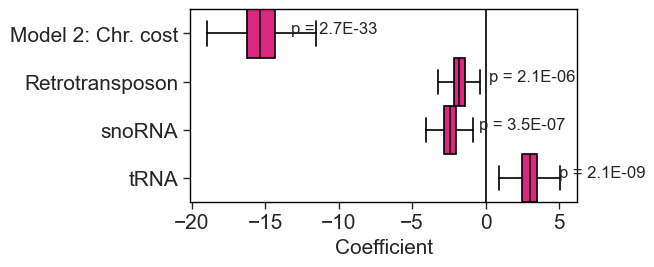

In [135]:
sns.set(rc={'figure.figsize': (5, 2.5)})

sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 1)
sns.set_style('ticks', {'axes.edgecolor': '0'})
PROPS = {
    'boxprops':{'facecolor':'#DC267F', 'edgecolor':'black'}} 
    
ax = sns.boxplot(y='variable', x='value', orient='h', 
                 data=DF_ssd1, **PROPS,
                 width=1, showfliers = False)
ax.grid(False)
ax.set_xlabel("Coefficient", fontsize=15)
ax.set(ylabel=None)
ax.tick_params(labelsize=15)
ax.axvline(0, color='black')
plt.setp(ax.artists, edgecolor='black')
plt.setp(ax.lines, color='black')
#plt.style.use('_mpl-gallery')
f = ['Model 2: Chr. cost','Retrotransposon', 'snoRNA', 'tRNA' ]
for x in range(nested_ssd1.shape[0]): 
    print(f[x])
    ax.text(DF_ssd1[DF_ssd1['variable'] == f[x]].value.mean() + 2, x , 'p = ' + str('%.1E' % Decimal(float(nested_ssd1[nested_ssd1.features == f[x]]['p-value']))), fontsize=12)
plt.savefig('plots/multissd1_coeffs_bootstrap_pval.pdf', bbox_inches='tight')
plt.show()

In [136]:
def Fitlin_multi_mean(RG1, cx1, cy, ax_l, label = r'$wild-type - adj. R^2 : $ ', color = '#648FFF', filenamesvg=None, labels=True,  alpha=1):
    X1 = RG1[cx1]
    y1 = list(RG1[cy])
    
    X1 = preprocessing.scale(X1)
    X1 = sm.add_constant(X1)
    results1 = sm.OLS(y1, X1).fit()
    y_pred1 = results1.predict(X1)
    RG1['prediction'] = y_pred1
    
    print('Parameters WT: ', results1.params)
    print('R2 WT: ', results1.rsquared)
    print('Adjusted R2 WT: ', results1.rsquared_adj)
    print('F p-value WT: ', results1.f_pvalue)


    #colors = ['#648FFF', '#DC267F']
    #sns.set(rc={'figure.figsize':(4.5,3.5)})
    #sns.set_style("white")


    f, ax = plt.subplots()
    ax.set(xlim=(min((y_pred1))-5, max((y_pred1))+5), ylim=(min(y1)-5, max(y1)+5))
    sns.regplot(x='prediction', y=cy, data=RG1, ax=ax, truncate=False, scatter=False,
                color=color)

    mean1 = RG1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x='prediction', y=cy, data=mean1, ax=ax, s=60, alpha=alpha, color=color, legend=False)
    
    y_m1 = list(mean1[cy])
    x_m1 = list(mean1['prediction'])
    n1 = list(mean1['Chromosome'])
    
    plt.xlabel(ax_l[0], fontsize=16)
    plt.ylabel(ax_l[1], fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    patch1 = mpatches.Patch(color=color, label= label  +  str(round(results1.rsquared_adj, 2)))

    plt.legend(handles=[patch1], fontsize= 13,  loc='lower right')
    
    if labels:
        for i in range(len(n1)):
            ax.text(x_m1[i] + ((max(y_pred1)/100)), y_m1[i] + (max(y1)/100), n1[i], horizontalalignment='center', color=color, weight='light', fontsize= 12)
    
    if filenamesvg != None:
        f.savefig(filenamesvg, bbox_inches='tight')
        
    plt.show()

    return results1

In [137]:
def Fitlin_multi_test(RG1, test1, cx, cy, ax_l, colors = ['#648FFF', '#FE6100'], filenamesvg=None, labels=True,  alpha=1):
    X1 = RG1[cx]
    y1 = list(RG1[cy])
    
    Xt1 = test1[cx]
    yt1 = list(test1[cy])
    
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(X1)
    
    X1 = scaler.transform(X1)
    X1 = sm.add_constant(X1)
    
    Xt1 = scaler.transform(Xt1)
    Xt1 = sm.add_constant(Xt1)
    
    results1 = sm.OLS(y1, X1).fit()
    y_pred1 = results1.predict(X1)
    RG1['prediction'] = y_pred1
    
    print('Parameters WT: ', results1.params)
    print('R2 WT: ', results1.rsquared)
    print('Adjusted R2 WT: ', results1.rsquared_adj)
    print('F p-value WT: ', results1.f_pvalue)
    
    yt_pred1 = results1.predict(Xt1)
    test1['prediction'] = yt_pred1
    yt_p_np1 = np.array(yt_pred1)
    yt_np1 = np.array(yt1)
    
    print()
    print('R2 score of test set: ', r2_score(yt_np1, yt_p_np1))
    print('Adjusted R2 of test set: ',round((1-((1-r2_score(yt_np1, yt_p_np1))*(len(Xt1)-1))/(len(Xt1)-1 -1)) ,3))

    yt_p_np1 = np.array(yt_pred1)
    yt_np1 = np.array(yt1)
    
    #sns.set(rc={'figure.figsize':(4.5,3.5)})
    #sns.set_style("white")
    #sns.set_style('white', rc={
    #'xtick.bottom': True,
    #'ytick.left': True,
    #})          

    sns.set_style('ticks')
    
    # regression of train set
    f, ax = plt.subplots()
    ax.set(xlim=(min((y_pred1))-5, max((y_pred1))+5), ylim=(min(y1)-5, max(y1)+5))
    sns.regplot(x='prediction', y=cy, data=RG1, ax=ax, truncate=False, scatter=False,
                color=colors[0])
    
    # plotting train set mean points
    mean1 = RG1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x='prediction', y=cy, data=mean1, ax=ax, s=60, alpha=alpha, color=colors[0], legend=False)
    
    y_m1 = list(mean1[cy])
    x_m1 = list(mean1['prediction'])
    n1 = list(mean1['Chromosome'])

    # Plotting the test set
    test_mean1 = test1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x='prediction', y=cy, data= test_mean1, ax=ax, s=60, alpha=alpha, color=colors[1], legend=False)
    
    yt_m1 = list(test_mean1[cy])
    xt_m1 = list(test_mean1['prediction'])
    nt1 = list(test_mean1['Chromosome'])
    
    if labels:
        for i in range(len(n1)):
            ax.text(x_m1[i] + ((max(y_pred1)/100)), y_m1[i] + (max(y1)/100), n1[i], horizontalalignment='center', color=colors[0], weight='light', fontsize= 12)
        
        for i in range(len(nt1)):
            ax.text(xt_m1[i] + ((max(yt_pred1)/100)), yt_m1[i] + (max(yt1)/100), nt1[i], horizontalalignment='center', color=colors[1], weight='light', fontsize= 12)
    
    patch1 = mpatches.Patch(color=colors[0], label= r'Train set - $adj. R^2 : $ '  +  str(round(results1.rsquared_adj, 2)))
    patch2 = mpatches.Patch(color=colors[1], label= r'Test set - $adj. R^2 : $ ' +  str(round((1-((1-r2_score(yt_np1, yt_p_np1))*(len(Xt1)-1))/(len(Xt1)-1 -1)) ,2)))

    plt.legend(handles=[patch1, patch2], fontsize= 12,  loc='lower right')
    plt.xlabel(ax_l[0], fontsize=16)
    plt.ylabel(ax_l[1], fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()    

    if filenamesvg != None:
        f.savefig(filenamesvg, bbox_inches='tight')
        
    plt.show()
    
    # GQ test
    threshold_p_value = 0.05
    resids = y_pred1 - y1

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, results1.model.exog)[:-1],
                       columns=['value'],
                       index=['F statistic', 'p-value'])

    print('\n Goldfeld-Quandt test (homoscedasticity) ----')
    print(gq_test)

    # Check if p-value is below the threshold
    if gq_test.loc['p-value', 'value'] < threshold_p_value:
        print("Homoscedasticity test: Does not pass (heteroscedasticity is present)")
    else:
        print("Homoscedasticity test: Passes (homoscedasticity is assumed)")

    return results1

Parameters WT:  [ 96.72485639 -29.06221067  -5.93578005   7.52730549]
R2 WT:  0.7505054246592968
Adjusted R2 WT:  0.7371396438374734
F p-value WT:  6.91255712342859e-17

R2 score of test set:  0.7144433168983158
Adjusted R2 of test set:  0.686


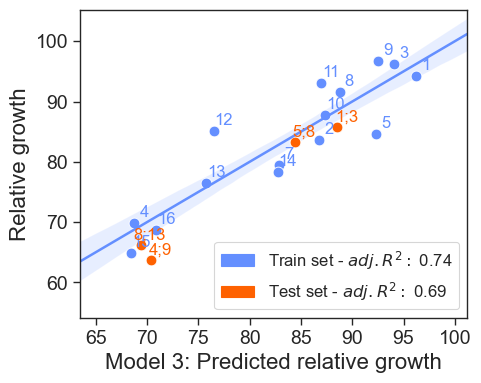

meta NOT subset; don't know how to subset; dropped



 Goldfeld-Quandt test (homoscedasticity) ----
                value
F statistic  2.091938
p-value      0.032632
Homoscedasticity test: Does not pass (heteroscedasticity is present)


In [139]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
resWT = Fitlin_multi_test(RG_WT, test_WT, ['Model 2: Chr. cost', 'snoRNA', 'tRNA'] , 'MEAN RG', ['Model 3: Predicted relative growth', 'Relative growth'], filenamesvg='plots/model3_test.pdf')

Parameters WT:  [83.39925504 -8.17763011 -1.62934101  2.40044029]
R2 WT:  0.750505424659297
Adjusted R2 WT:  0.7371396438374737
F p-value WT:  6.912557123428419e-17


meta NOT subset; don't know how to subset; dropped


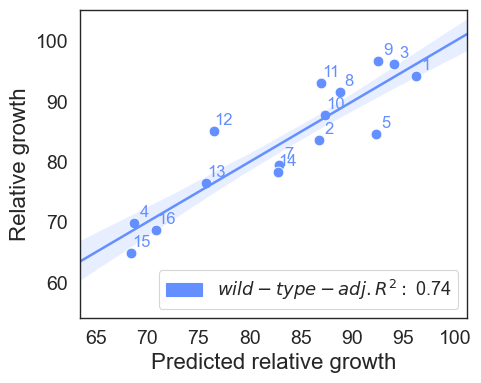

In [140]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m3_WT = Fitlin_multi_mean(RG_WT, ['Model 2: Chr. cost', 'snoRNA', 'tRNA'] , 'MEAN RG', ['Predicted relative growth', 'Relative growth'], color = '#648FFF', filenamesvg='plots/multiLin_WT.pdf')

In [141]:
X = RG_WT[['Model 2: Chr. cost', 'snoRNA', 'tRNA']]
y = list(RG_WT['MEAN RG'])

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X = sm.add_constant(X)

y_pred = m3_WT.predict(X)
resids = y_pred - y

residual_df = pd.DataFrame({'Chromosome': RG_WT['Chromosome'], 'm3': resids})
res_mean_df = residual_df.groupby('Chromosome', as_index=False).mean()
res_mean_df = res_mean_df.rename(columns={'m3': 'm3 mean'})
res_std_df = residual_df.groupby('Chromosome', as_index=False).std()
res_std_df = res_std_df.rename(columns={'m3': 'm3 std'})
del res_std_df['Chromosome']
res_mean_df = res_mean_df.join(res_std_df)

Parameters WT:  [83.39925504 -8.52333043 -0.92954115]
R2 WT:  0.7020096169326904
Adjusted R2 WT:  0.6915538140180479
F p-value WT:  1.0345800072605079e-15


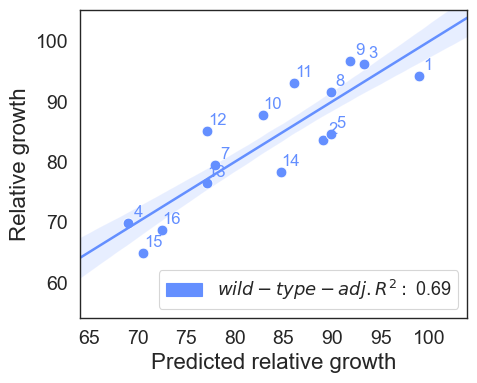

In [142]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m3_WT_notRNA = Fitlin_multi_mean(RG_WT, ['Model 2: Chr. cost', 'snoRNA',] , 'MEAN RG', ['Predicted relative growth', 'Relative growth'], color = '#648FFF')

In [143]:
X = RG_WT[['Model 2: Chr. cost', 'snoRNA']]
y = list(RG_WT['MEAN RG'])

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X = sm.add_constant(X)

y_pred = m3_WT_notRNA.predict(X)
resids = y_pred - y

residual_df = pd.DataFrame({'Chromosome': RG_WT['Chromosome'], 'm3-tRNA': resids})
tmp = residual_df.groupby('Chromosome', as_index=False).mean()
tmp = tmp.rename(columns={'m3-tNRA': 'm3-tRNA mean'})
tmp_std = residual_df.groupby('Chromosome', as_index=False).std()
tmp_std = tmp_std.rename(columns={'m3-tRNA': 'm3-TRNA std'})
del tmp_std['Chromosome']
tmp = tmp.join(tmp_std)
del tmp['Chromosome']
res_mean_df = res_mean_df.join(tmp)

In [144]:
res_mean_df['m3 - m3-tRNA mean'] = np.abs(np.abs(res_mean_df['m3 mean']) -np.abs(res_mean_df['m3-tRNA']))

In [145]:
res_mean_df.sort_values('m3 - m3-tRNA mean')

,Chromosome,m3 mean,m3 std,m3-tRNA,m3-TRNA std,m3 - m3-tRNA mean
0,1,-10.911653,3.122608,-10.948157,3.122608,0.036503
1,2,-3.013531,1.294305,-3.120181,1.294305,0.106650
13,15,10.616738,5.044681,10.390574,5.044681,0.226164
12,14,1.242758,5.204089,0.980346,5.204089,0.262412
14,16,7.467907,4.897183,7.093307,4.897183,0.374600
6,8,-10.426886,2.880148,-10.954181,2.880148,0.527294
11,13,1.183337,5.674153,0.643230,5.674153,0.540107
10,12,-7.321943,4.775056,-7.989232,4.775056,0.667290
3,4,5.675028,2.374512,4.932680,2.374512,0.742348
7,9,-14.437914,2.655826,-15.513031,2.655826,1.075117


Parameters WT:  [ 74.7458023  -16.77450584  -3.28760022   4.01966778  -3.34248219]
R2 WT:  0.9426614029304818
Adjusted R2 WT:  0.9381642580622843
F p-value WT:  5.4827368827958676e-31


meta NOT subset; don't know how to subset; dropped


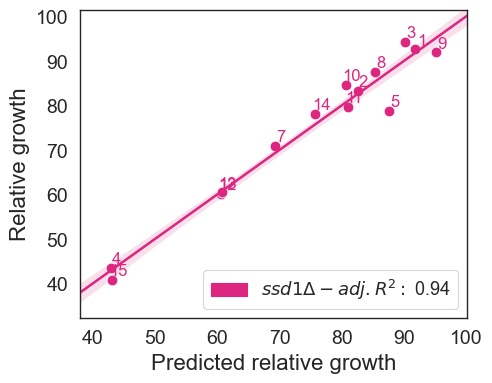

In [146]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m3_ssd1 = Fitlin_multi_mean(RG_ssd1, ['Model 2: Chr. cost', 'snoRNA', 'tRNA', 'Retrotransposon'] , 'MEAN RG',  ['Predicted relative growth', 'Relative growth'], label = r'$ssd1\Delta - adj. R^2 : $ ', color = '#DC267F', filenamesvg='plots/multiLin_ssd1.pdf')

## Test effect of tRNA

In [148]:
X = RG_ssd1[['Model 2: Chr. cost', 'snoRNA', 'tRNA', 'Retrotransposon']]
y = list(RG_ssd1['MEAN RG'])

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X = sm.add_constant(X)

y_pred = m3_ssd1.predict(X)
resids = y_pred - y

residual_df_S = pd.DataFrame({'Chromosome': RG_ssd1['Chromosome'], 'm3': resids})
res_mean_df_S = residual_df_S.groupby('Chromosome', as_index=False).mean()
res_mean_df_S = res_mean_df_S.rename(columns={'m3': 'm3 mean'})
res_std_df_S = residual_df_S.groupby('Chromosome', as_index=False).std()
res_std_df_S = res_std_df_S.rename(columns={'m3': 'm3 std'})
del res_std_df_S['Chromosome']
res_mean_df_S = res_mean_df_S.join(res_std_df_S)

Parameters WT:  [ 74.7458023  -17.02086722  -2.12895267  -3.2586571 ]
R2 WT:  0.8912650243695801
Adjusted R2 WT:  0.8849918526985944
F p-value WT:  4.8720151199263965e-25


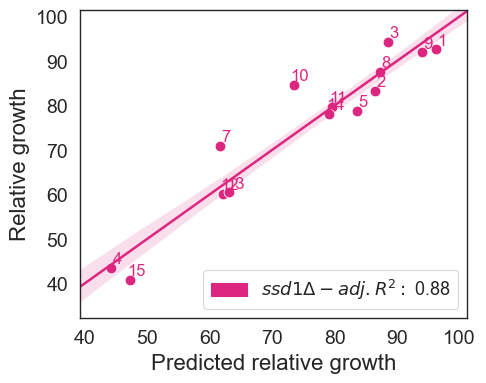

In [149]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m3_ssd1_notRNA = Fitlin_multi_mean(RG_ssd1, ['Model 2: Chr. cost', 'snoRNA', 'Retrotransposon'] , 'MEAN RG',  ['Predicted relative growth', 'Relative growth'], label = r'$ssd1\Delta - adj. R^2 : $ ', color = '#DC267F')

In [150]:
X = RG_ssd1[['Model 2: Chr. cost', 'snoRNA', 'Retrotransposon']]
y = list(RG_ssd1['MEAN RG'])

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X = sm.add_constant(X)

y_pred = m3_ssd1_notRNA.predict(X)
resids = y_pred - y

residual_df = pd.DataFrame({'Chromosome': RG_ssd1['Chromosome'], 'm3-tRNA': resids})
tmp = residual_df.groupby('Chromosome', as_index=False).mean()
tmp = tmp.rename(columns={'m3-tNRA': 'm3-tRNA mean'})
tmp_std = residual_df.groupby('Chromosome', as_index=False).std()
tmp_std = tmp_std.rename(columns={'m3-tRNA': 'm3-TRNA std'})
del tmp_std['Chromosome']
tmp = tmp.join(tmp_std)
del tmp['Chromosome']
res_mean_df_S = res_mean_df_S.join(tmp)

In [151]:
res_mean_df.sort_values('m3 - m3-tRNA mean')

,Chromosome,m3 mean,m3 std,m3-tRNA,m3-TRNA std,m3 - m3-tRNA mean
0,1,-10.911653,3.122608,-10.948157,3.122608,0.036503
1,2,-3.013531,1.294305,-3.120181,1.294305,0.106650
13,15,10.616738,5.044681,10.390574,5.044681,0.226164
12,14,1.242758,5.204089,0.980346,5.204089,0.262412
14,16,7.467907,4.897183,7.093307,4.897183,0.374600
6,8,-10.426886,2.880148,-10.954181,2.880148,0.527294
11,13,1.183337,5.674153,0.643230,5.674153,0.540107
10,12,-7.321943,4.775056,-7.989232,4.775056,0.667290
3,4,5.675028,2.374512,4.932680,2.374512,0.742348
7,9,-14.437914,2.655826,-15.513031,2.655826,1.075117


In [153]:
res_mean_df_S['m3 - m3-tRNA mean'] = np.abs(np.abs(res_mean_df_S['m3 mean']) -np.abs(res_mean_df_S['m3-tRNA']))
res_mean_df_S.sort_values('m3 - m3-tRNA mean')

,Chromosome,m3 mean,m3 std,m3-tRNA,m3-TRNA std,m3 - m3-tRNA mean
0,1,-21.472729,2.196913,-21.452227,2.196913,0.020502
1,2,-14.719031,1.793647,-14.772524,1.793647,0.053494
13,15,16.968554,3.338664,16.891499,3.338664,0.077055
12,14,-11.429164,1.545585,-11.725164,1.545585,0.296000
11,13,2.163400,5.149765,1.454130,5.149765,0.709270
6,8,-18.163015,3.308721,-18.928274,3.308721,0.765258
10,12,2.554470,3.802682,1.671949,3.802682,0.882522
3,4,14.282609,1.770857,13.391462,1.770857,0.891147
7,9,-19.713547,3.242489,-21.430596,3.242489,1.717049
9,11,-11.365782,1.603611,-13.218799,1.603611,1.853017


# Compare commonly deleterious to commonly neutral

In [186]:
rob = pd.read_csv('datasets/Robinson_MoBylogFC.csv')

In [187]:
rob

,UID,BC187_YPD_Avg_log2_Fitness_Score,BC187_FDR,BY4743_YPD_Avg_log2_Fitness_Score,BY4743_FDR,DBVPG1373_YPD_Avg_log2_Fitness_Score,DBVPG1373_FDR,NCYC3290_YPD_Avg_log2_Fitness_Score,NCYC3290_FDR,Y12_YPD_Avg_log2_Fitness_Score,...,YJM1592_YPD_Avg_log2_Fitness_Score,YJM1592_FDR,YJM978_YPD_Avg_log2_Fitness_Score,YJM978_FDR,YPS128_YPD_Avg_log2_Fitness_Score,YPS128_FDR,YPS163_YPD_Avg_log2_Fitness_Score,YPS163_FDR,YPS606_YPD_Avg_log2_Fitness_Score,YPS606_FDR
0,YLR248W,0.121845,0.589700,-0.318184,2.873703e-02,-0.960879,2.723830e-04,-1.367972,4.312082e-03,-3.865272,...,-0.429359,0.329717,-2.282613,8.810000e-07,-3.144128,4.240000e-07,-0.751203,1.652920e-04,-2.655671,0.001311
1,YJL080C,0.103438,0.569848,-0.750228,1.180000e-06,NaN,NaN,-2.694566,6.810000e-07,-3.671277,...,-0.382051,0.195030,-0.949060,1.733745e-03,-1.296229,5.280450e-04,-0.561432,3.281660e-04,-2.402641,0.000772
2,YGL146C,0.060068,0.691126,0.352109,1.350090e-04,-0.245377,1.208888e-02,-1.082683,4.580000e-05,-0.346361,...,-0.271693,0.259462,0.543658,2.473955e-03,-0.703407,2.588730e-02,-0.802944,1.330000e-07,-1.877977,0.001299
3,YOR198C,-0.101255,0.596991,-0.256964,6.270093e-02,-2.043087,3.730000e-09,-1.782251,1.350000e-08,-1.248494,...,-0.694586,0.000448,-0.769389,4.392142e-03,-0.859545,1.492778e-02,-0.604941,3.500000e-06,NaN,NaN
4,YER123W,0.020034,0.906217,-1.313831,7.160000e-20,-2.178763,1.800000e-28,-3.693308,4.130000e-11,-3.172277,...,0.035331,0.909215,0.016955,9.476178e-01,-1.080013,5.790000e-05,-1.957887,1.150000e-22,-1.515739,0.001327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,YGL151W,NaN,NaN,-0.149079,7.172982e-01,NaN,NaN,NaN,NaN,NaN,...,0.013547,0.989874,NaN,NaN,NaN,NaN,0.348781,5.865338e-01,NaN,NaN
4108,YPL186C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.981619,0.356463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4109,YDL027C,NaN,NaN,1.387833,1.877268e-02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.771031,1.971627e-01,NaN,NaN,NaN,NaN,NaN,NaN
4110,YBR288C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.197728,0.811566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
DF

,Model 2: Chr. cost,ARS,LTR,ncRNA,Retrotransposon,snoRNA,tRNA,snRNA,strains
0,-8.316770,0.000000,-0.00000,-0.498110,-0.000000,-0.155498,1.253986,-0.000000,WT
1,-7.755993,0.000000,-0.00000,-0.000000,-0.000000,-0.389483,1.919828,-0.446434,WT
2,-8.094379,0.000000,-0.42082,-0.000000,-0.000000,-1.519958,2.339178,-1.066203,WT
3,-6.251531,0.000000,-0.16321,-0.000000,-0.350874,-1.823607,2.207607,-1.363138,WT
4,-7.281322,0.310535,-0.00000,0.000000,-0.028248,-0.336824,2.019308,-0.000000,WT
...,...,...,...,...,...,...,...,...,...
995,-14.424263,0.000000,-0.00000,-0.000000,-1.950395,-2.370568,1.191020,-0.000000,ssd1
996,-15.962251,0.000000,-0.00000,-0.354608,-1.831703,-2.164742,3.260988,-0.000000,ssd1
997,-12.346839,0.000000,-0.00000,-0.936104,-1.567995,-2.545070,2.801070,-0.619299,ssd1
998,-16.341631,0.000000,-0.00000,-1.040876,-2.051002,-2.300180,2.943910,0.000000,ssd1
